## Case Study: Liver disease prediction
    

The following notebook performs logistic regression on a given dataset about patients to predict liver disease using a set of biomarkers.

[EDA](#eda)

[Logistic Regression](#logReg)

[Linear Regression](#linReg)

Importing required libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import math 

# Modelling algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, ElasticNet

# Modelling helpers
from sklearn.preprocessing import Normalizer, scale
from sklearn.model_selection import train_test_split

# from sklearn.feature_selection
from sklearn.model_selection import cross_val_score

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context = 'notebook', palette = 'dark', style = 'whitegrid' , color_codes = True)
params = { 
    'axes.labelsize': 'large',
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [5, 2]
}

plt.rcParams.update(params)

<a id='eda'></a>

Reading the data into a pandas dataframe:

In [3]:
df = pd.read_csv('indian liver Patient.csv')

Displaying the first and last 5 rows of the dataframe:

In [4]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


Getting basic information about the dataframe:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  is_patient                  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


As can be seen, the column with the albumin and globulin ratio has 4 null values. Since this column data is floating point type and only 4 null values are observed, the corresponding rows can be removed.

The same may be verified from the descriptive statistics as well.

In [6]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


This also shows the same, 4 null values in the above mentioned column.

Finally, we may verify the same using the .isnull() function.

In [7]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
is_patient                    0
dtype: int64

The rows with the null values are removed by the following step:

In [8]:
df = df[df['Albumin_and_Globulin_Ratio'].notnull()]

Next, it is checked if all the column names are alright.

In [9]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'is_patient '],
      dtype='object')

The column name 'is_patient ' has a space at the end which is not required and inconvenient. The space is removed and the column is renamed:

In [10]:
df.rename({'is_patient ': 'is_patient'}, axis = 1, inplace = True)

Verifying that the name has been changed:

In [11]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'is_patient'],
      dtype='object')

The column 'is_patient' is supposed to have just two values - 1 and 2. Verifying if any other values exist in the column:

In [12]:
df[(df['is_patient'] != 1) & (df['is_patient'] != 2)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,is_patient


No such rows exist.

### Univariate, bivariate and multivariate analyses:

A boxplot of one of the biomarkers in which an abnormally high maximum value was observed is seen:

<AxesSubplot:>

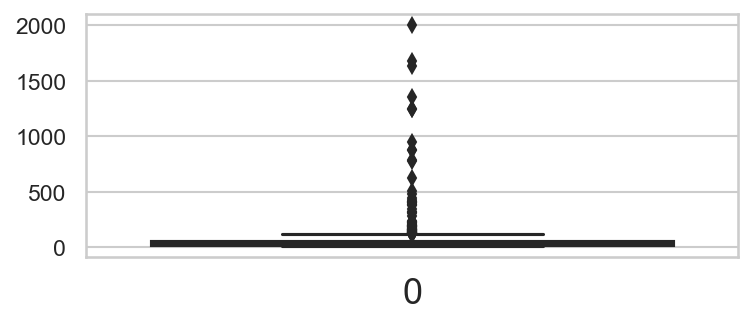

In [13]:
sns.boxplot(data = df['Alamine_Aminotransferase'])

The boxplot shows that there are a significant number of outliers. However, since the absolute possible maximum values of these biomarkers are not known and the dataset is relatively small, for the preliminary EDA, the outliers are not removed.

#### Correlation heatmap

Seeing the correlation between various columns:

<AxesSubplot:>

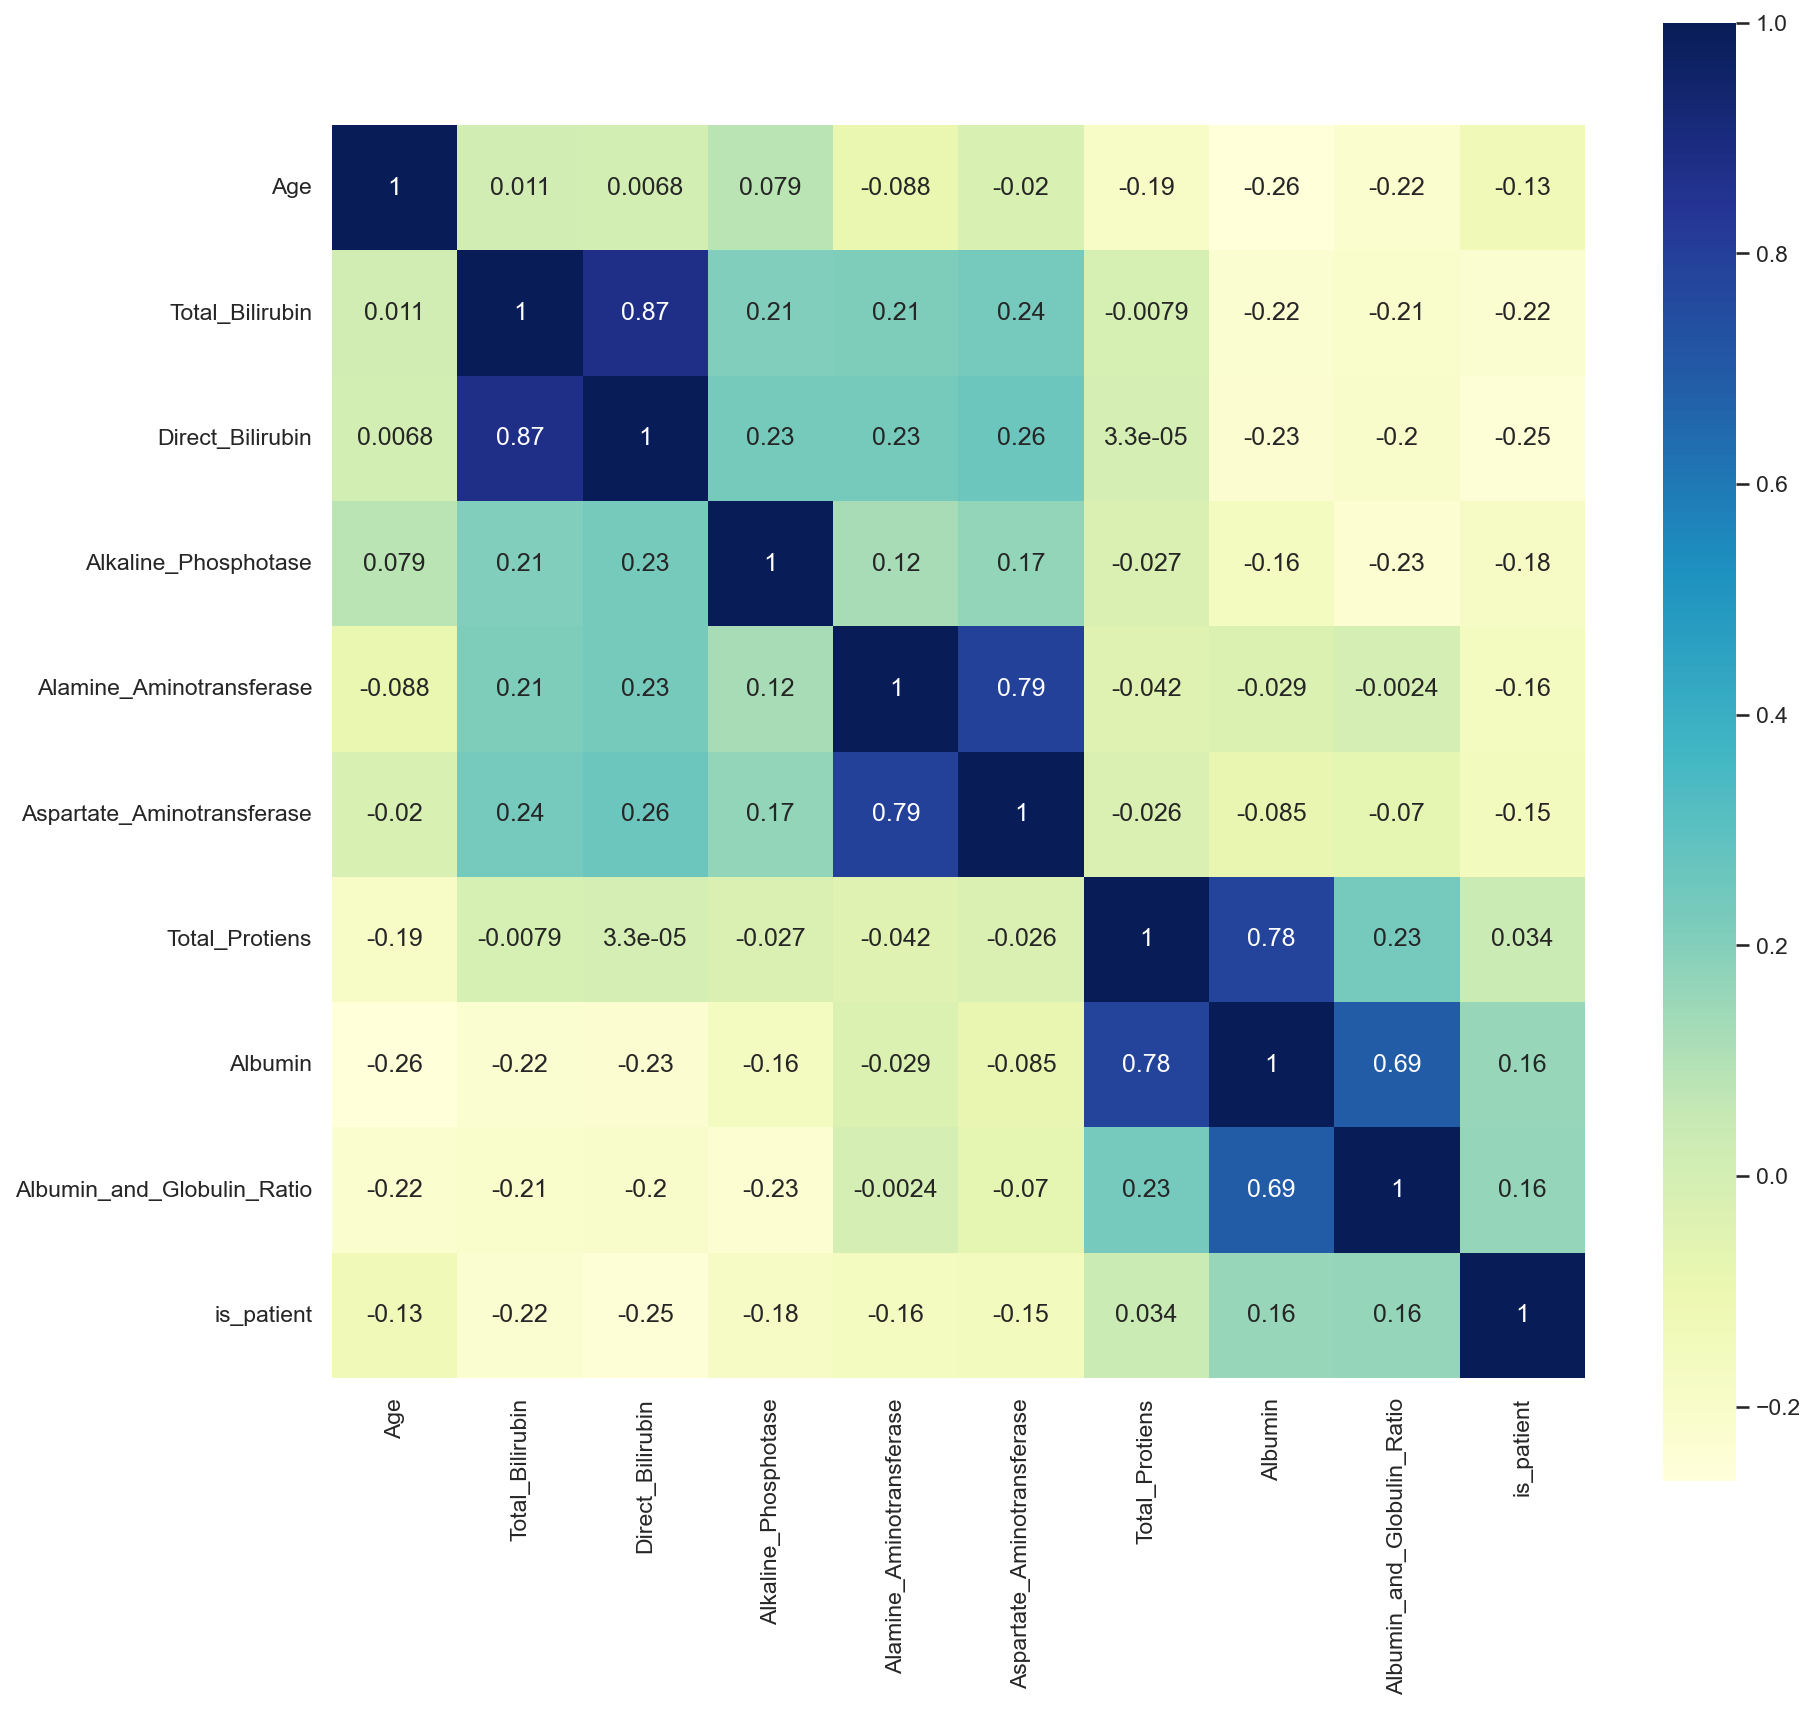

In [14]:
sns.set(rc = {'figure.figsize': (12, 12)})

corr = df.corr()
sns.heatmap(data = corr, square = True, annot = True, cbar = True, cmap = 'YlGnBu')

This heatmap only helps in knowing the relationships between numerical variables. One cannot glean anything from the correlation values associated with the 'is_patient' variable from this heatmap.

As can be naturally expected, higher correlations exist between albumin and total proteins, albumin and albumin_and_globulin_ratio, aspartate and alamine aminotransferases, direct and total bilirubin. This may be useful in feature selection later.

#### Gender and liver disease

Fraction of diseased females:

In [15]:
len(df[(df['Gender'] == 'Female') & (df['is_patient'] == 1)])/len(df[(df['Gender'] == 'Female')])

0.65

Fraction of diseased males:

In [16]:
len(df[(df['Gender'] == 'Male') & (df['is_patient'] == 1)])/len(df[(df['Gender'] == 'Male')])

0.7357630979498861

As can be seen, the percentage of diseased males is greater than the percentage of diseased females. This indicates a greater likelihood of males getting liver diseases than females.

The same can be understood visually by the following plots.

<AxesSubplot:xlabel='Gender', ylabel='Percent'>

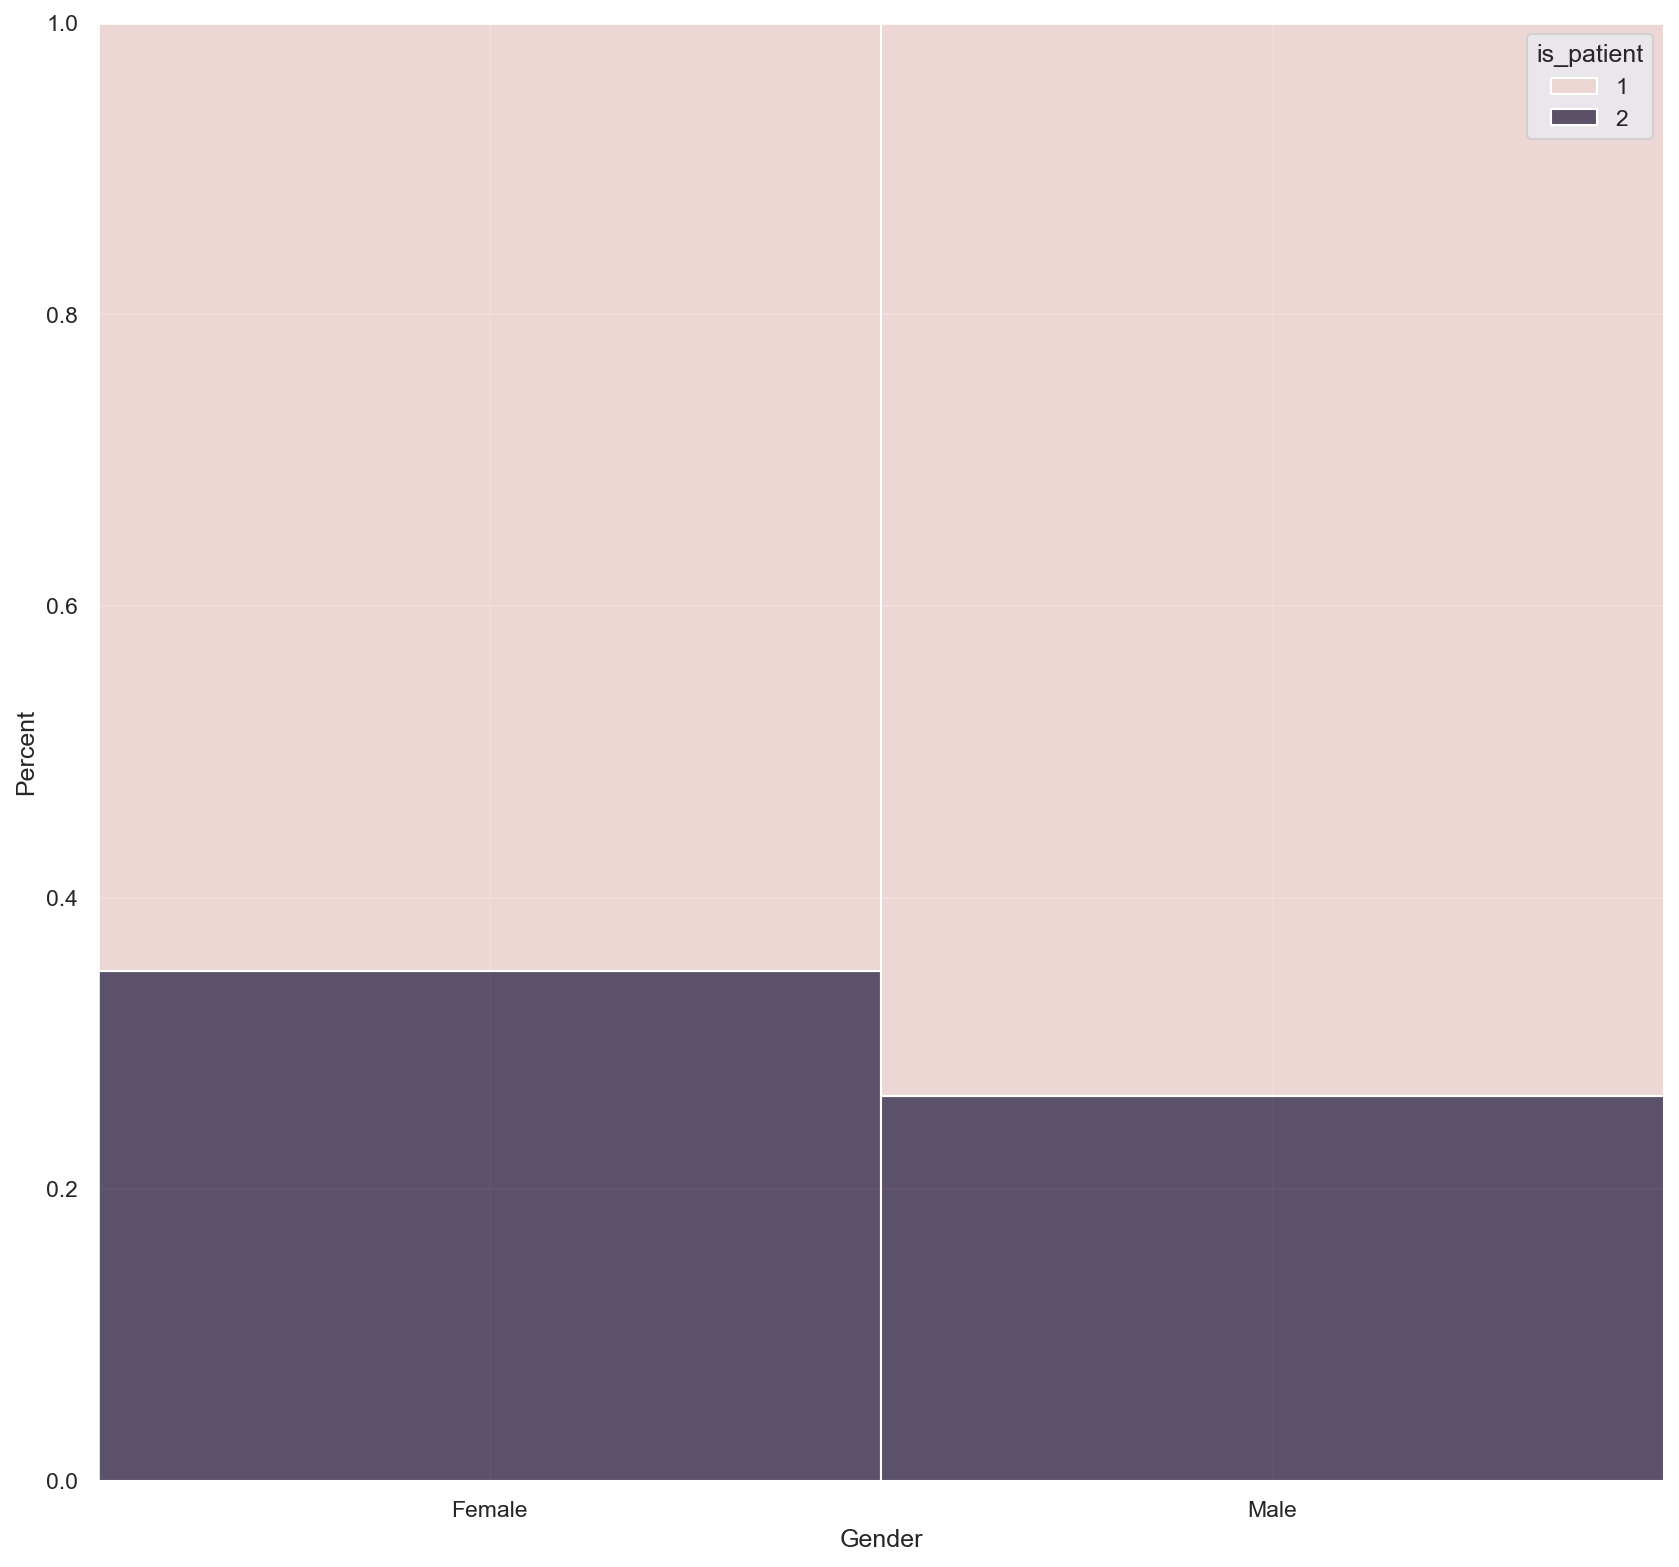

In [17]:
sns.histplot(data = df, x = "Gender", hue = "is_patient", stat = 'percent', multiple = 'fill')

#### Age and liver disease

<AxesSubplot:xlabel='Age', ylabel='Count'>

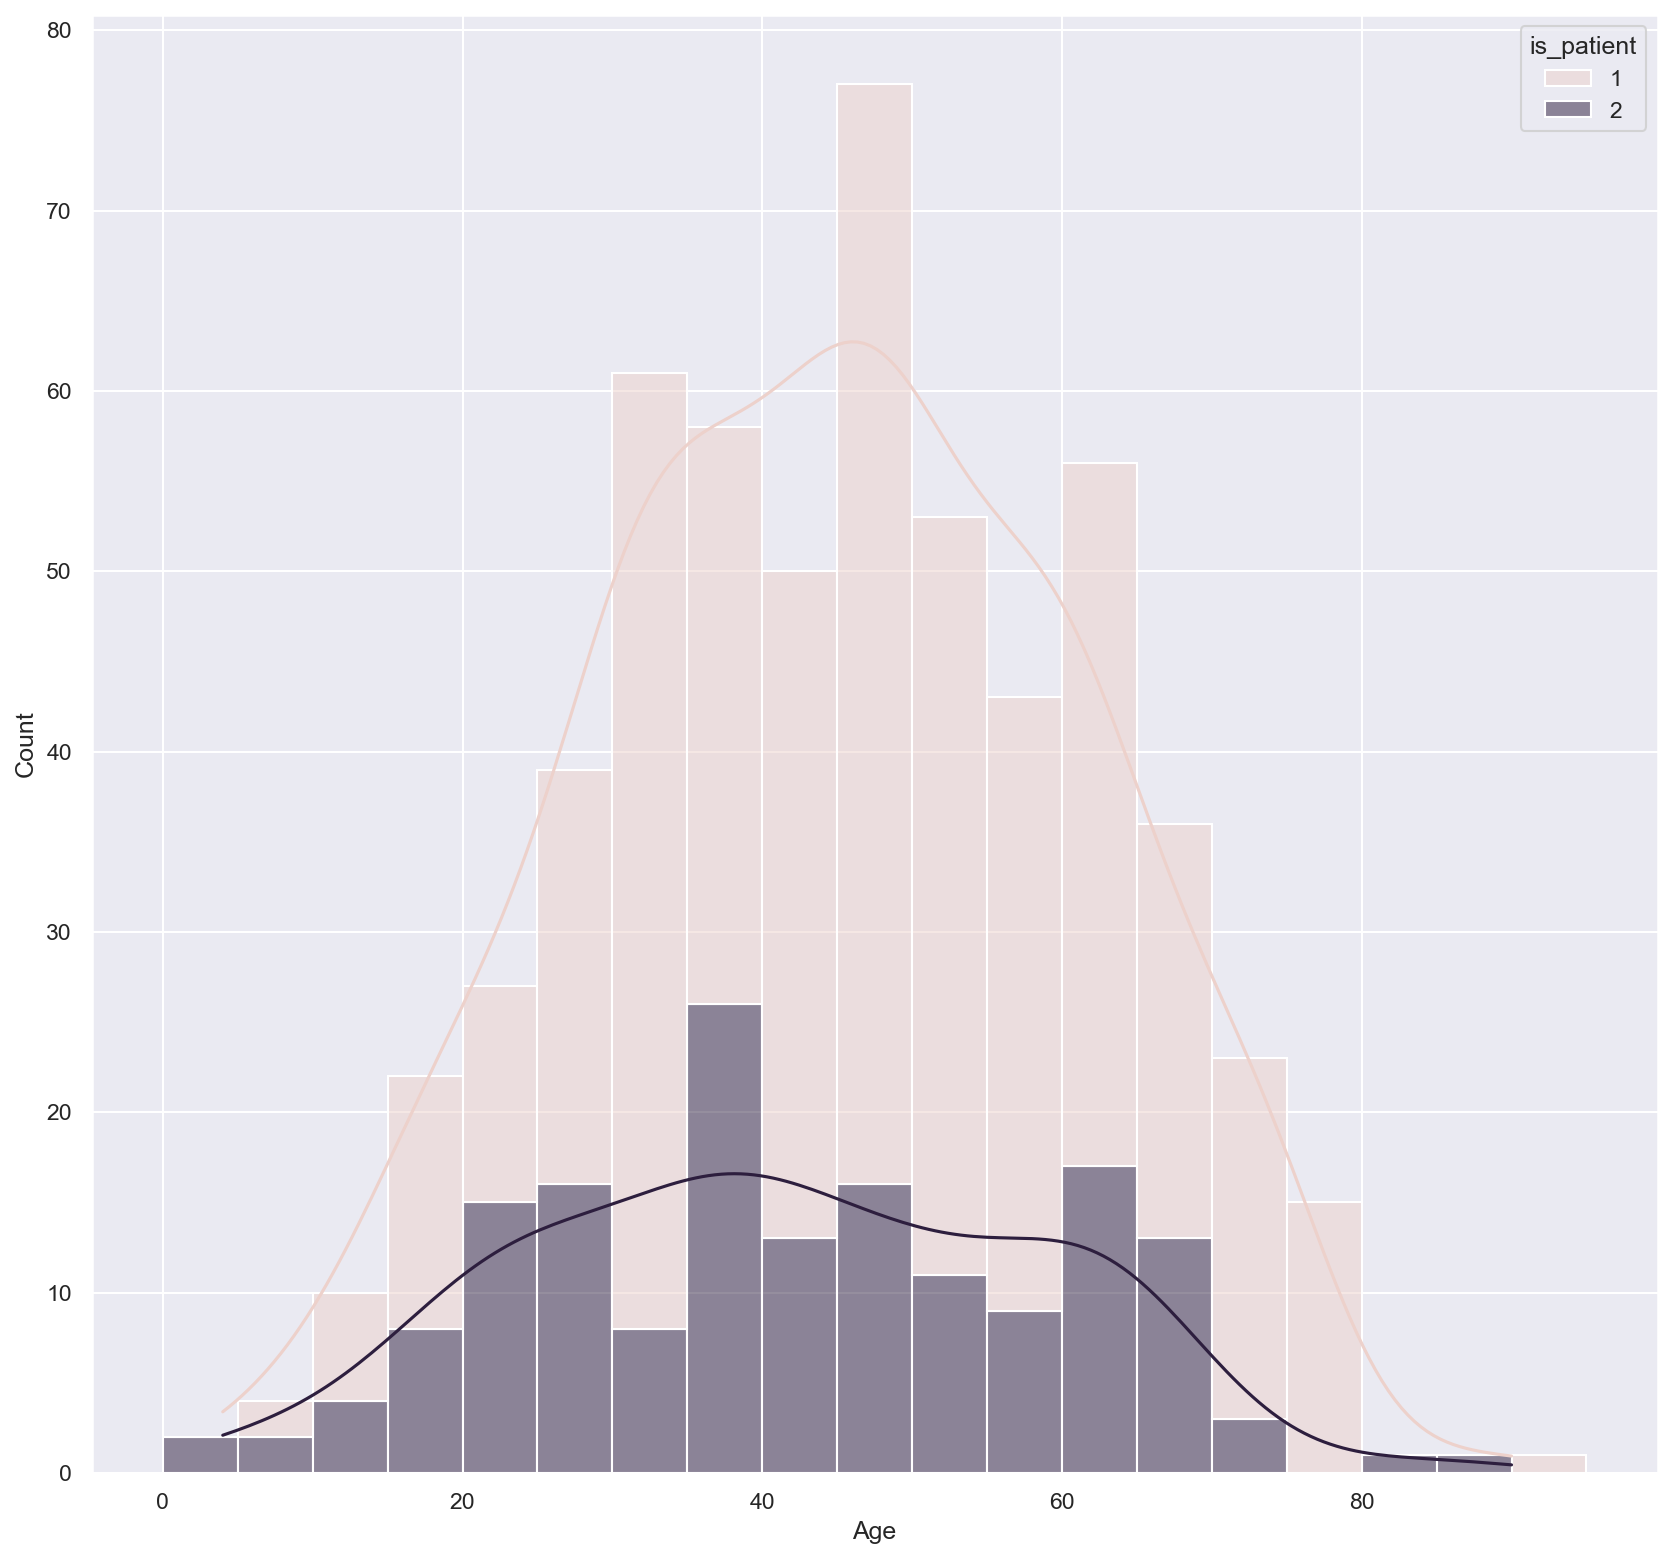

In [18]:
bins = [5*i for i in range(20)]
sns.histplot(data = df, x = "Age", hue = "is_patient", multiple = 'stack', bins = bins, kde = True)

Although at first look, it looks as if liver disease is highest in middle-aged patients (aged 40 to 60), it must be noted that the plot above has the count on the y-axis which may be misleading if the number of observations in each bin are not equal. Therefore, it is more informative if percentages are plotted on the y-axis instead of the absolute counts.

<AxesSubplot:xlabel='Age', ylabel='Percent'>

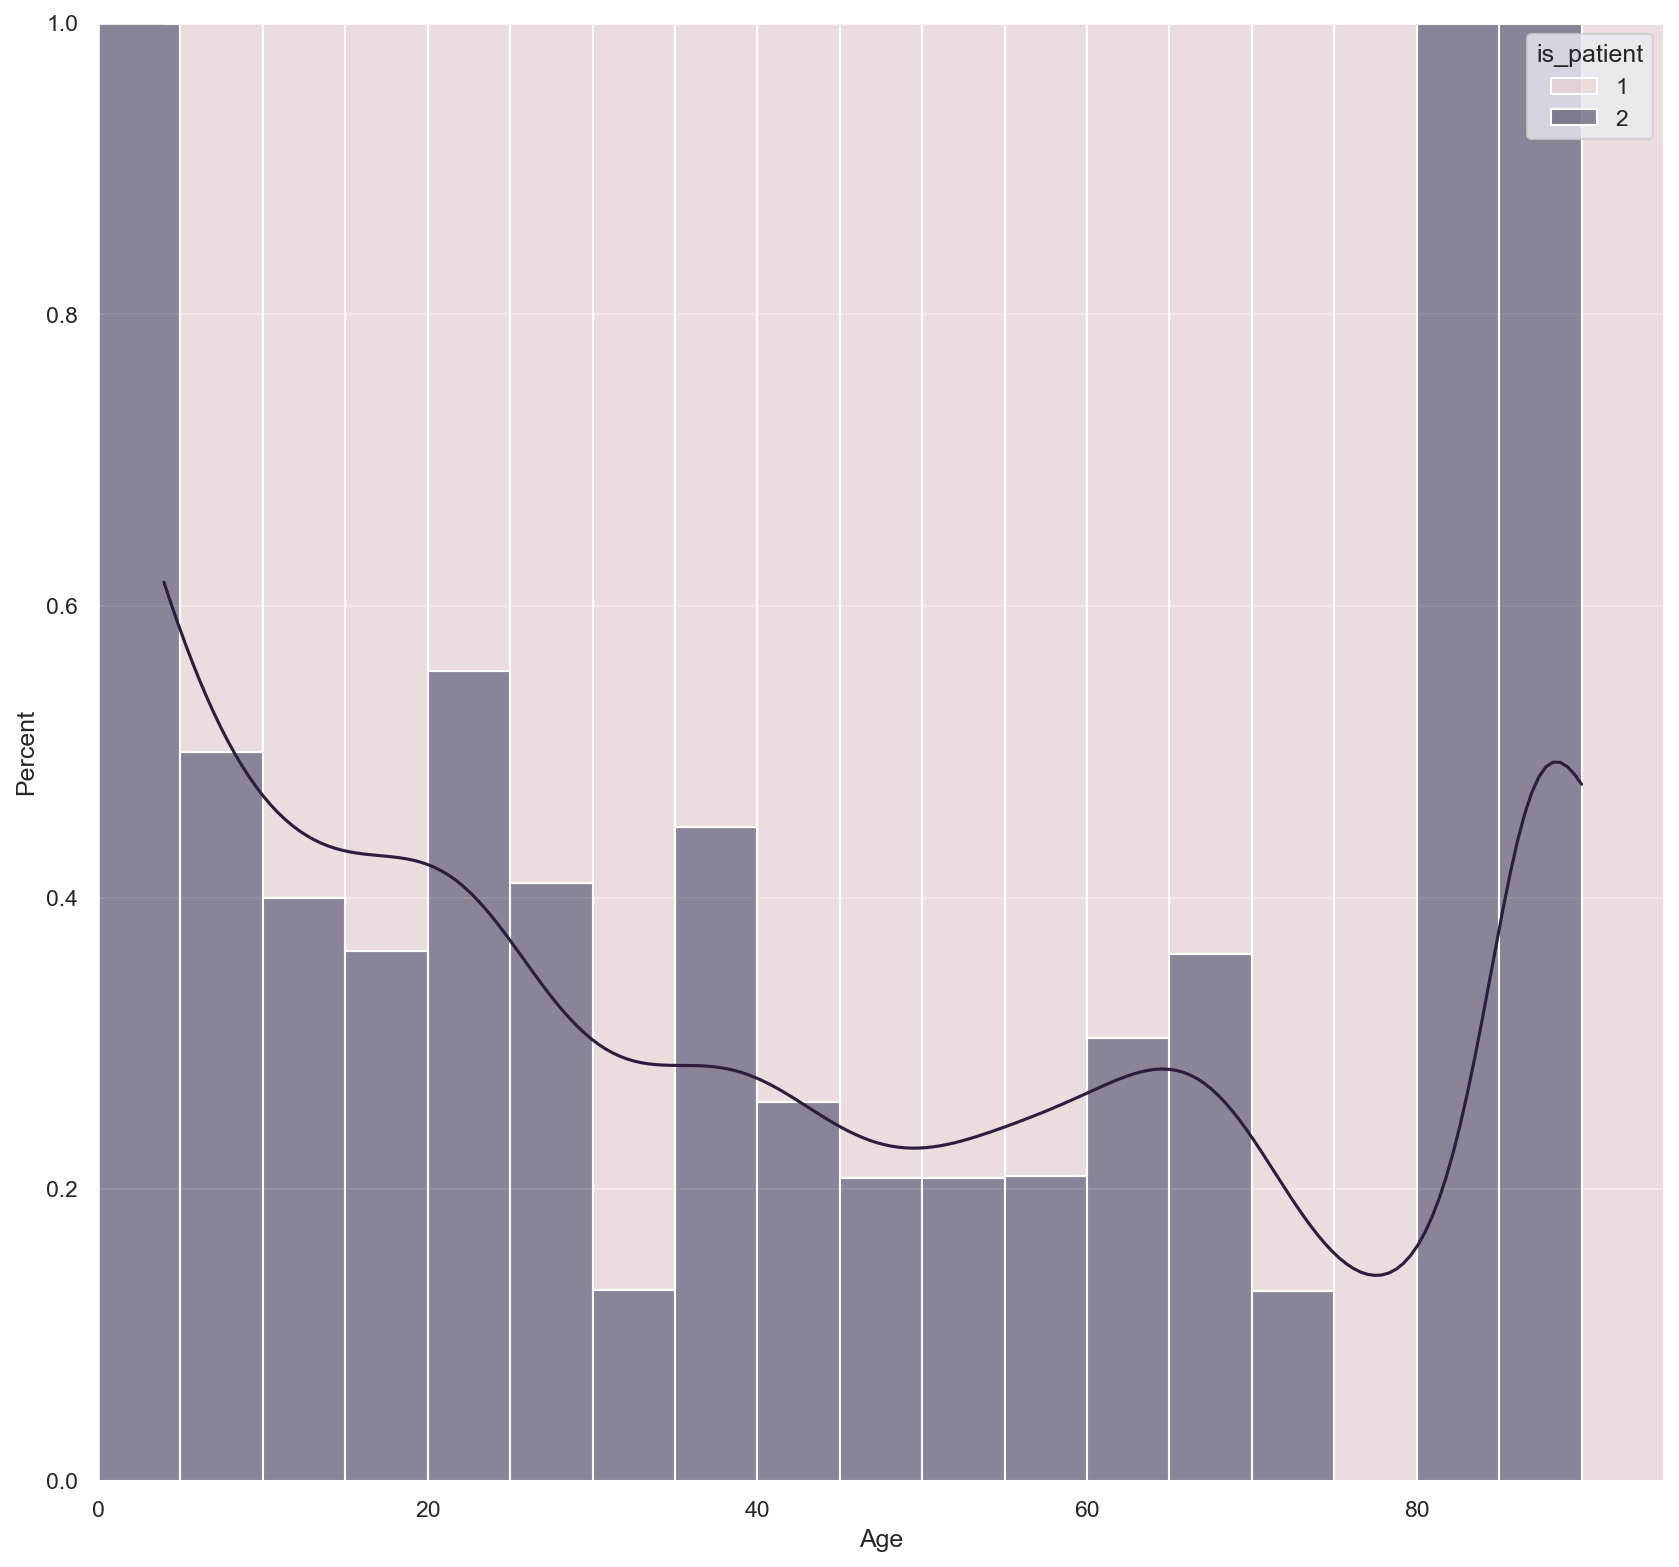

In [19]:
bins = [5*i for i in range(20)]
sns.histplot(data = df, x = "Age", hue = "is_patient", stat = 'percent', multiple = 'fill', bins = bins, kde = True)

This revised plot indicates that as age increases, the likelihood of liver disease increases. There are exceptions to the general trend which may be due to a small dataset or a well-defined scientific reason. It is difficult to ascertain the exact cause at this point in the analysis.

#### Biomarkers and liver disease

In the diseased patients, for each biomarker, the values are plotted as a histogram to identify ranges where the likelihood of having liver disease is highest. The x-axis uses a log scale since due to the presence of outliers, in some cases, the values span multiple orders of magnitude.

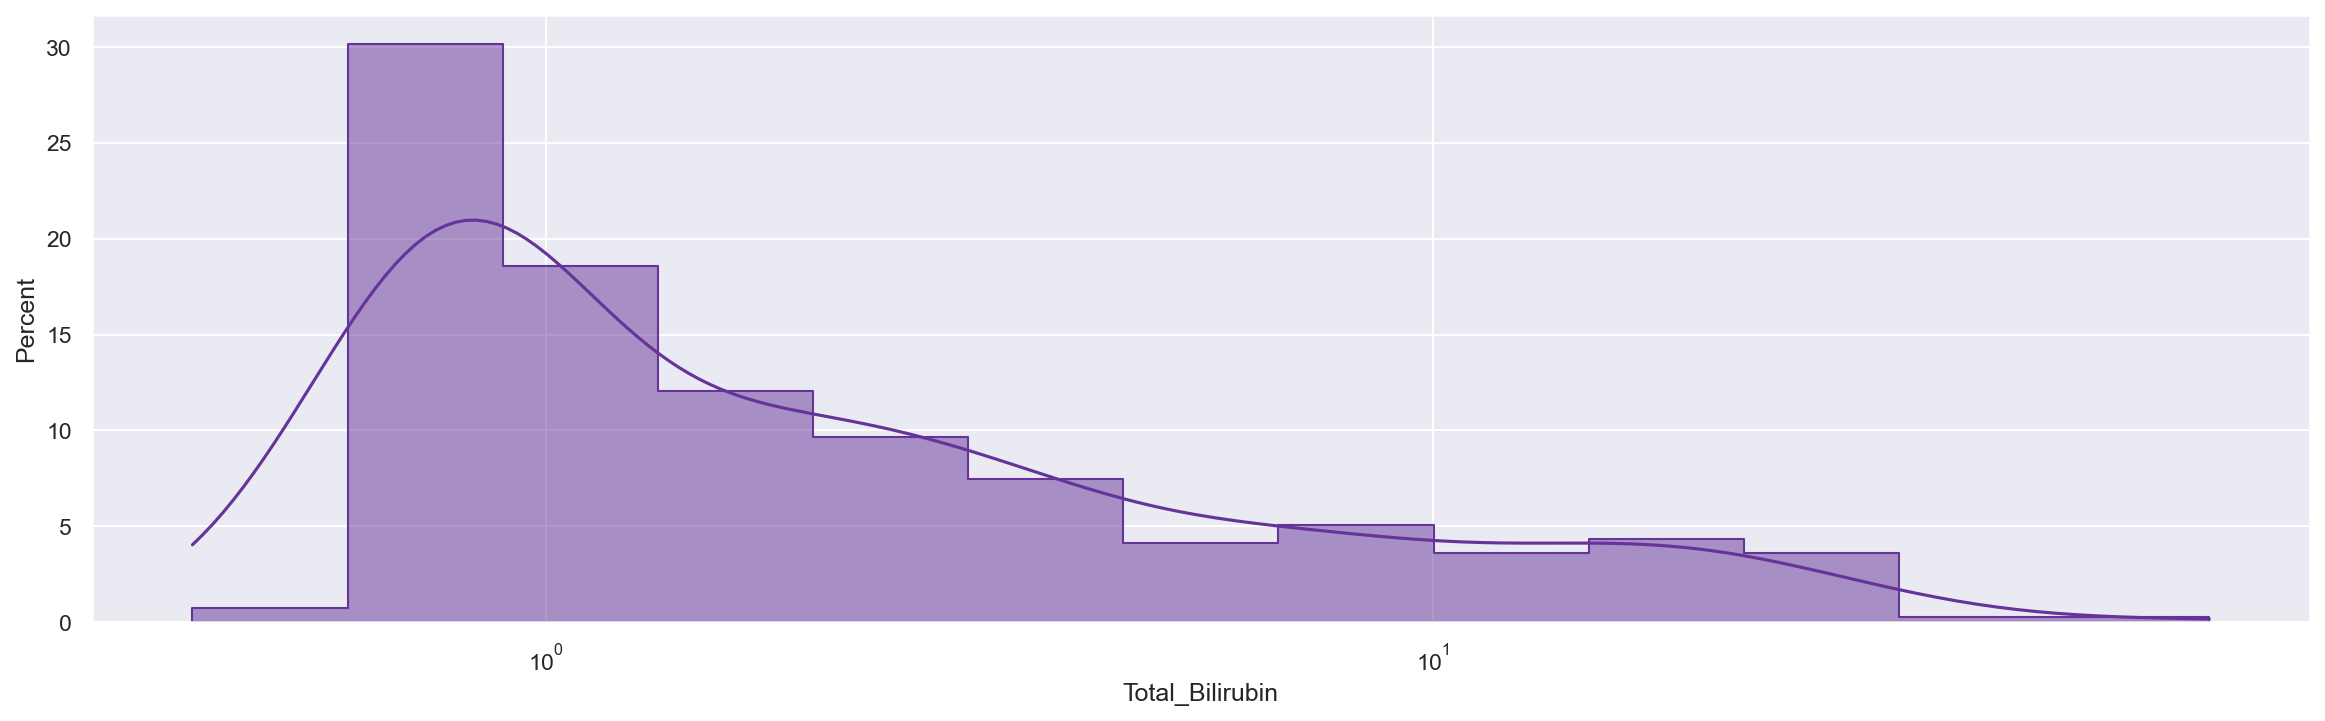

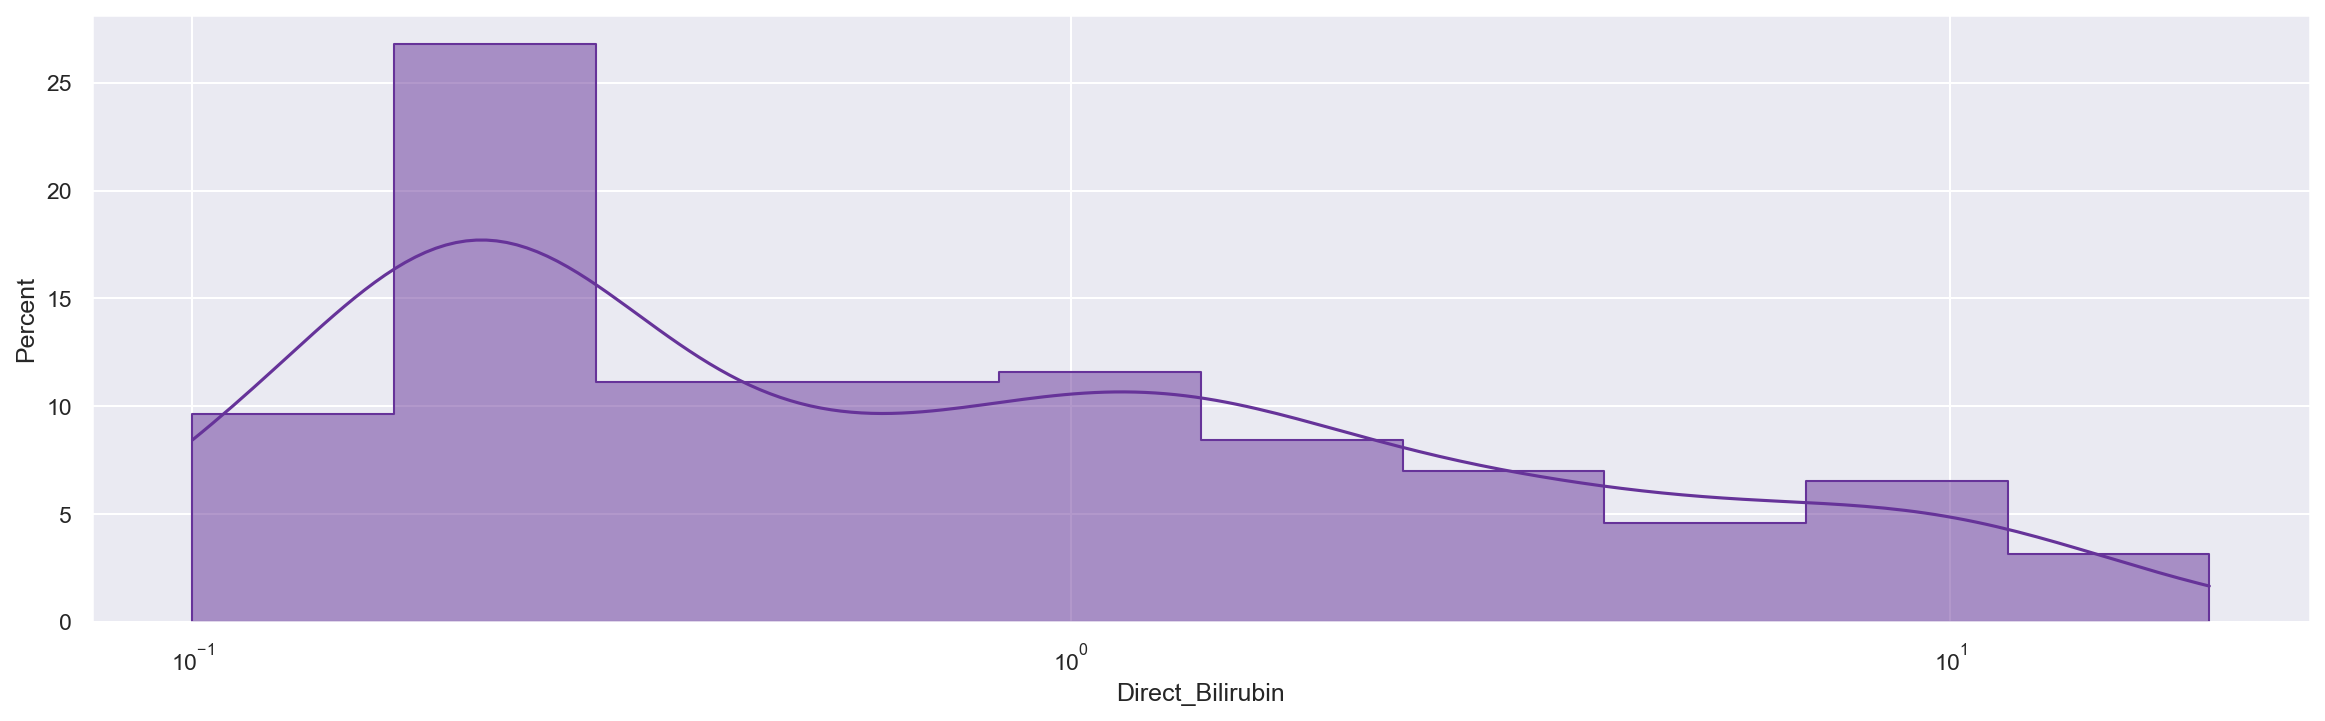

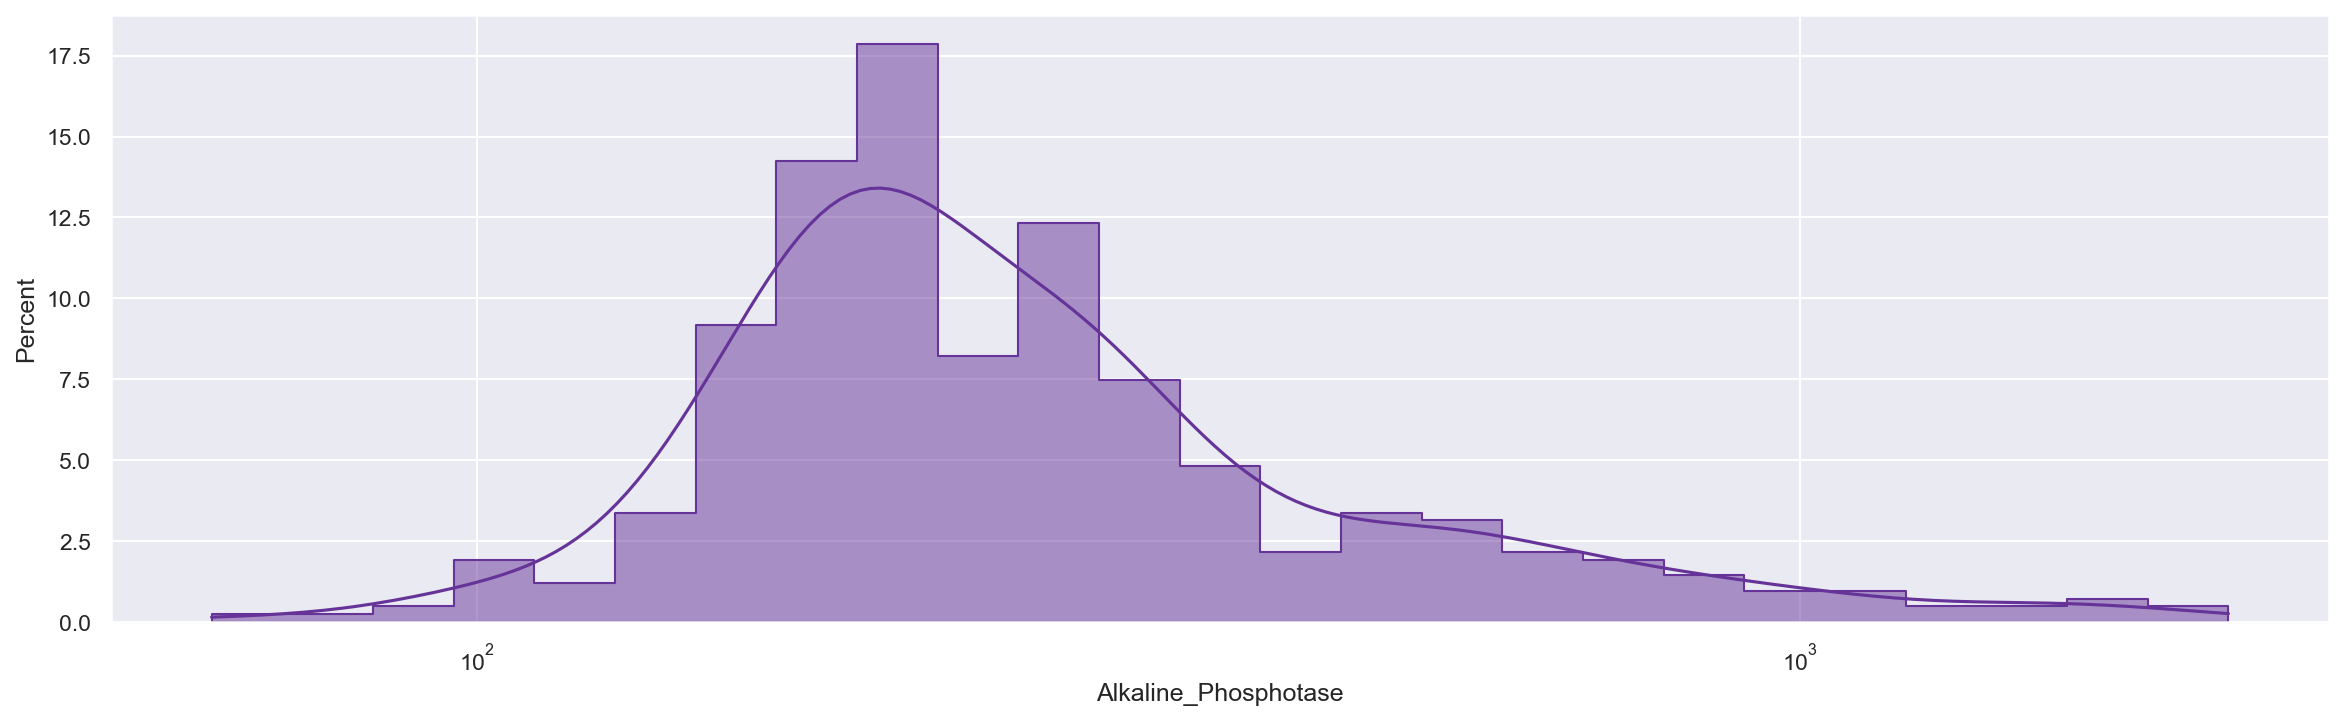

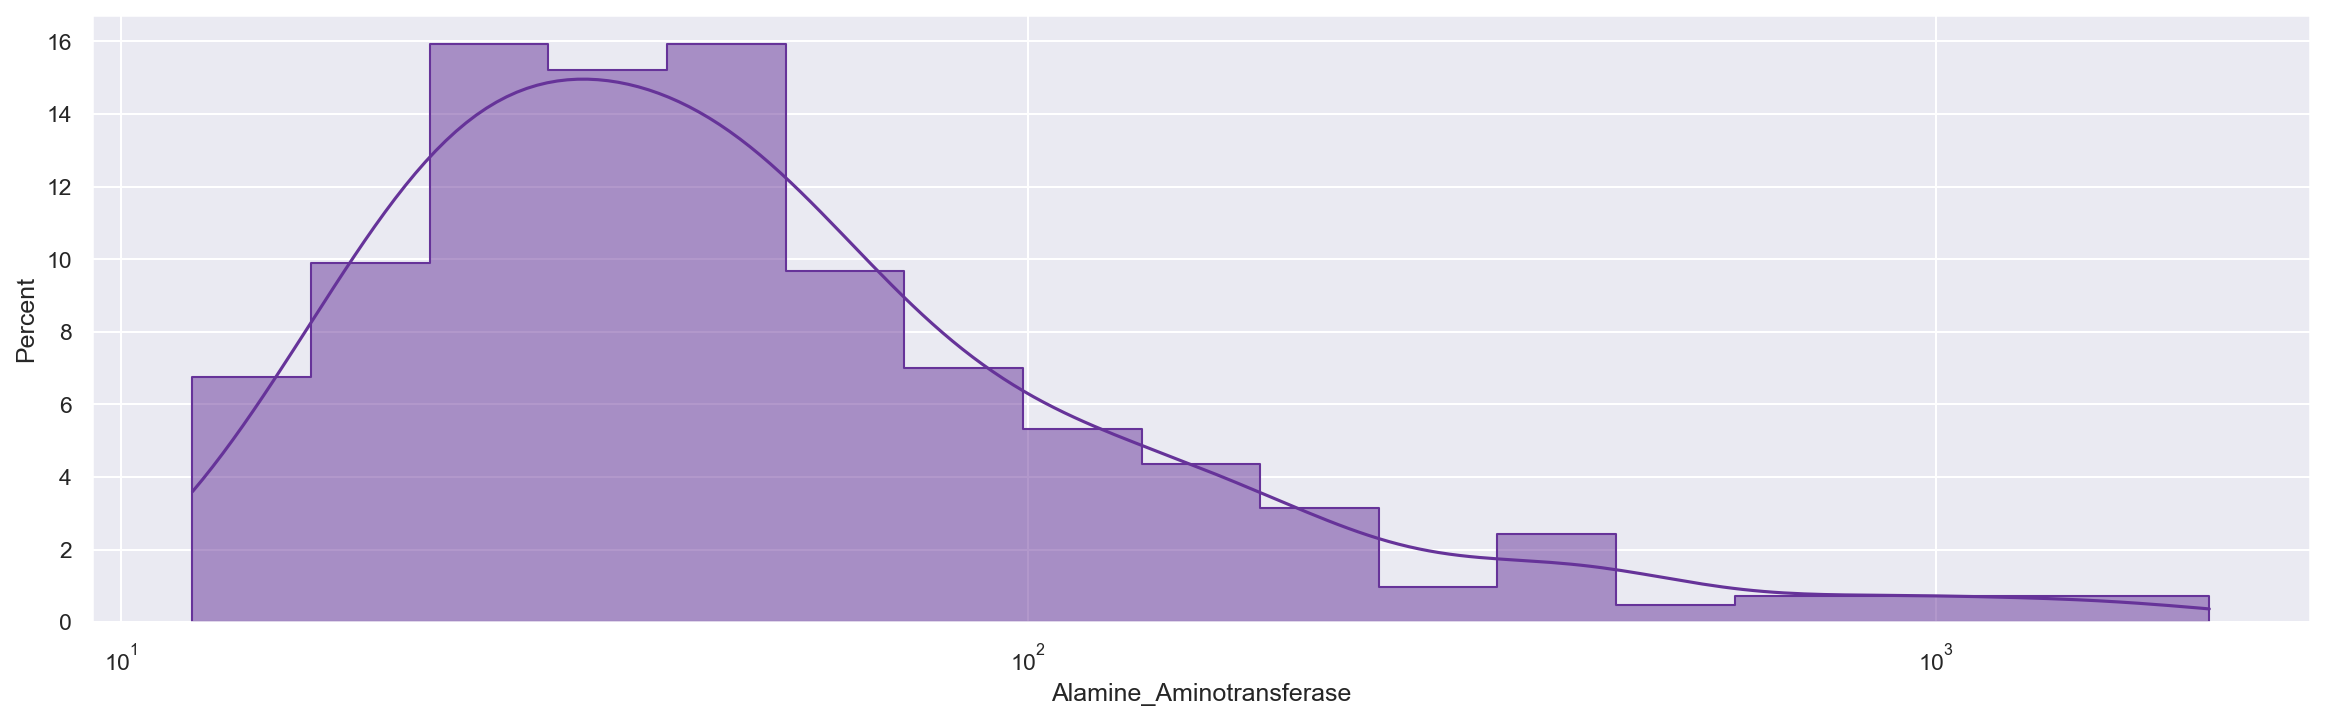

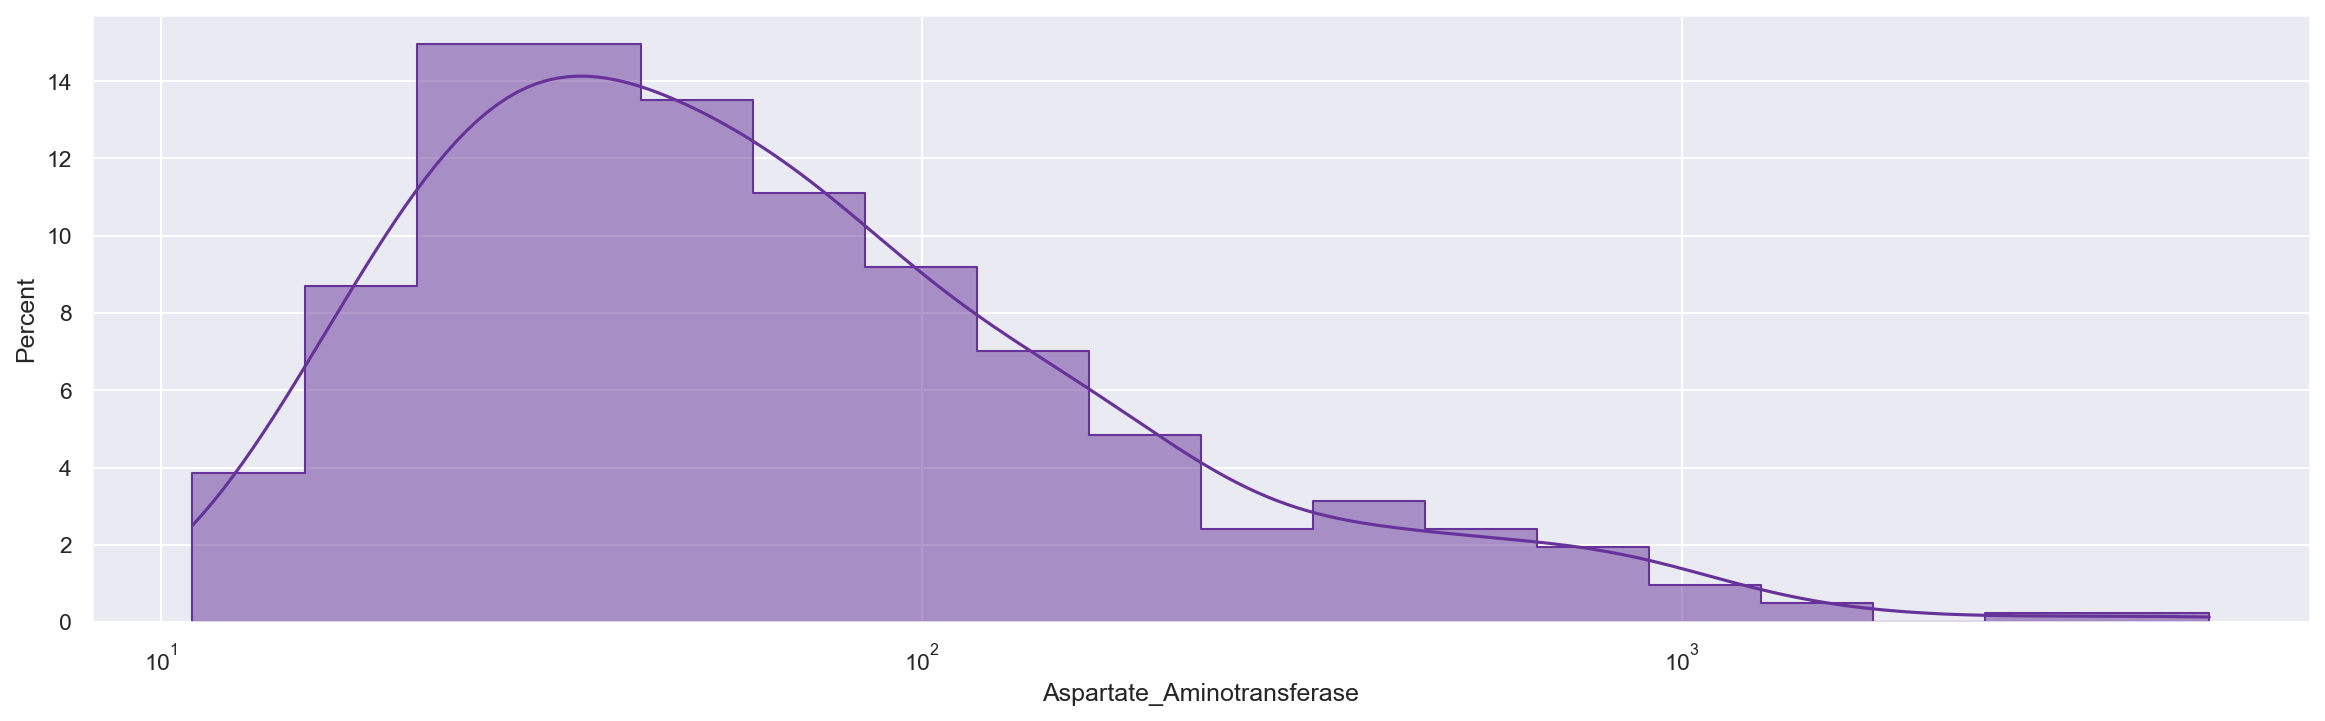

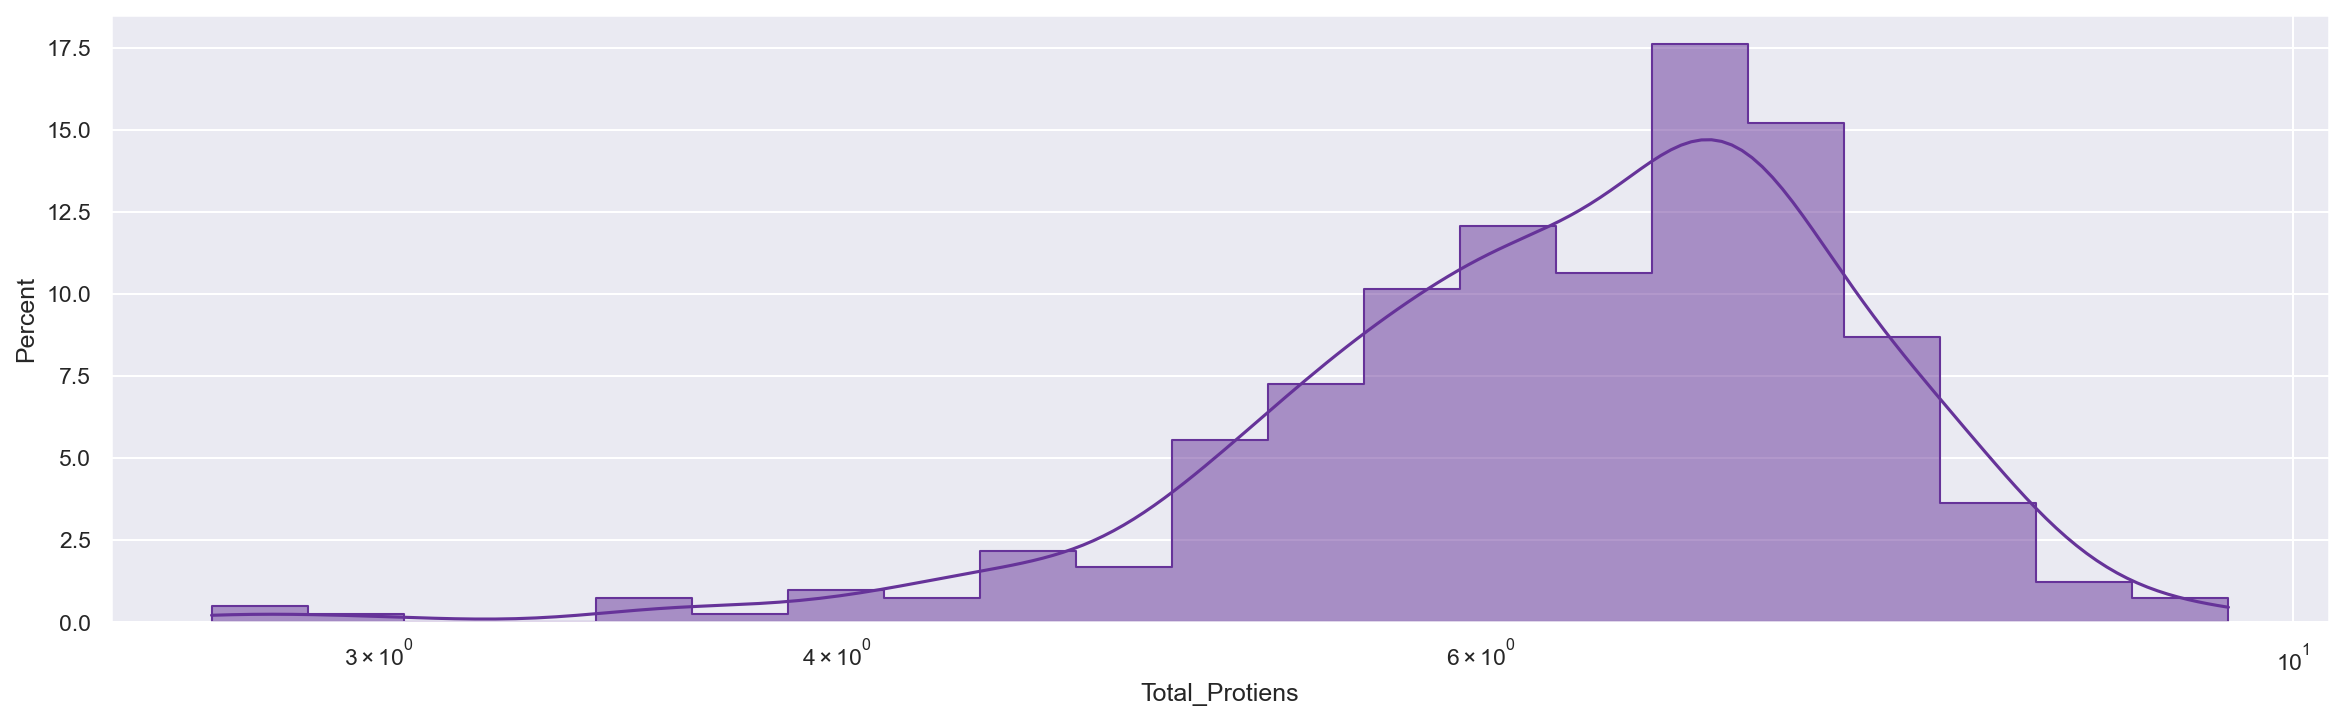

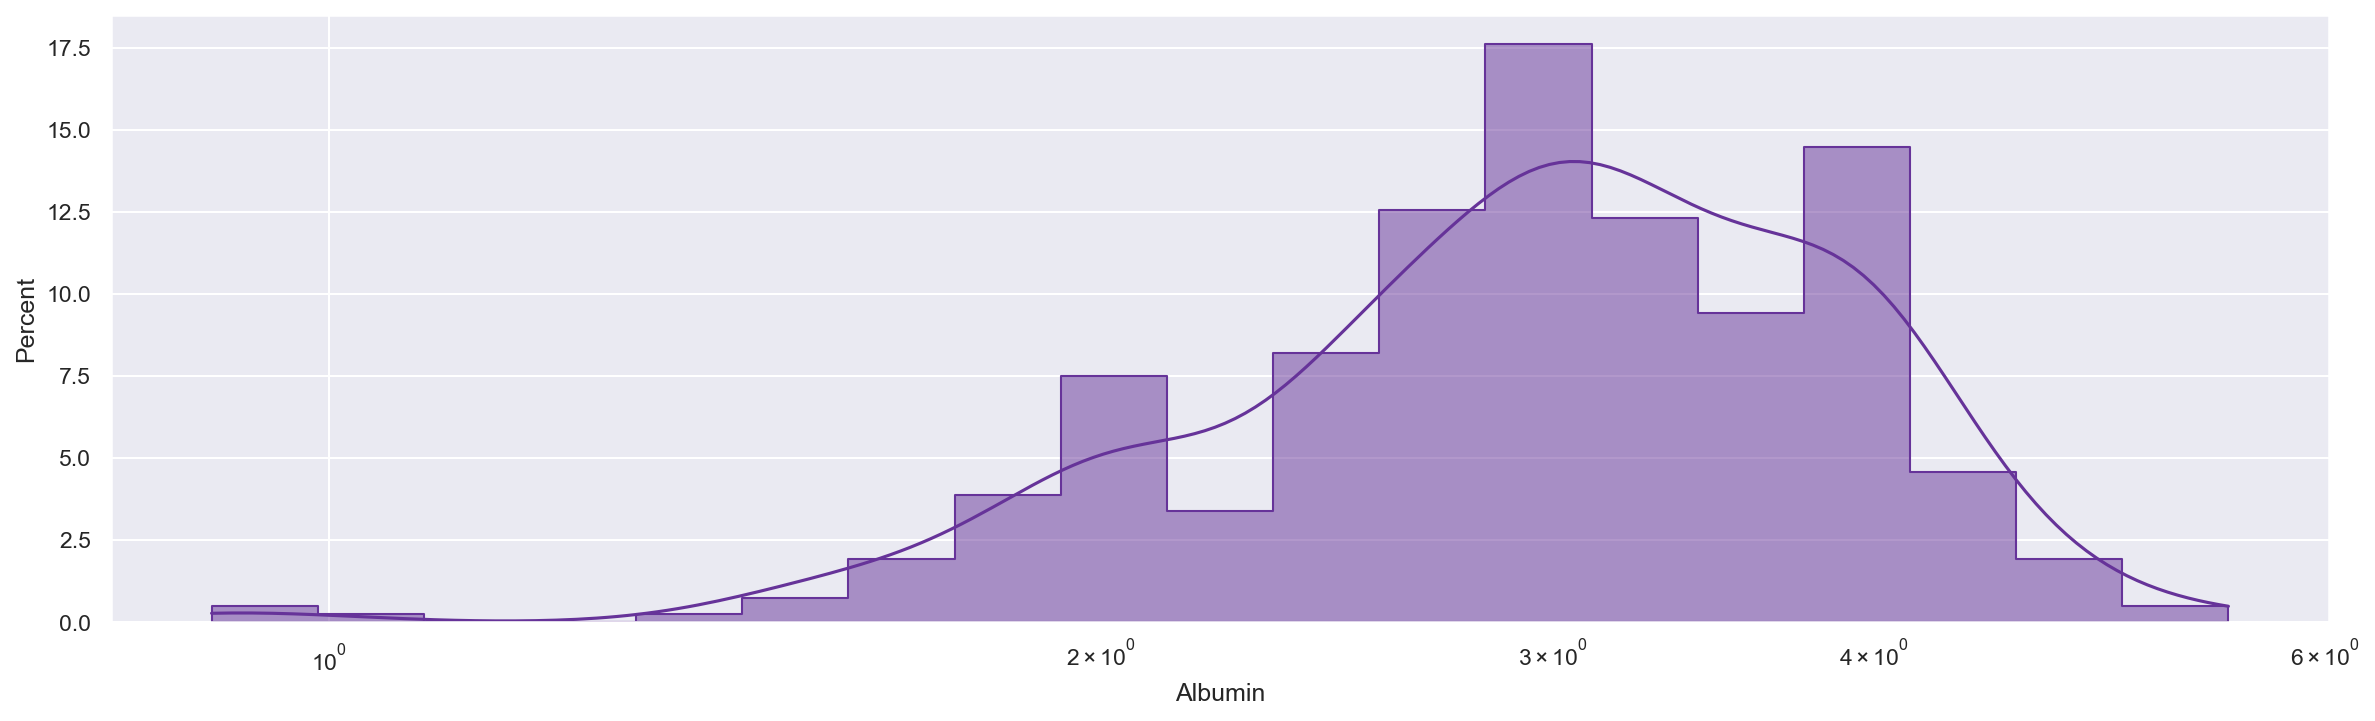

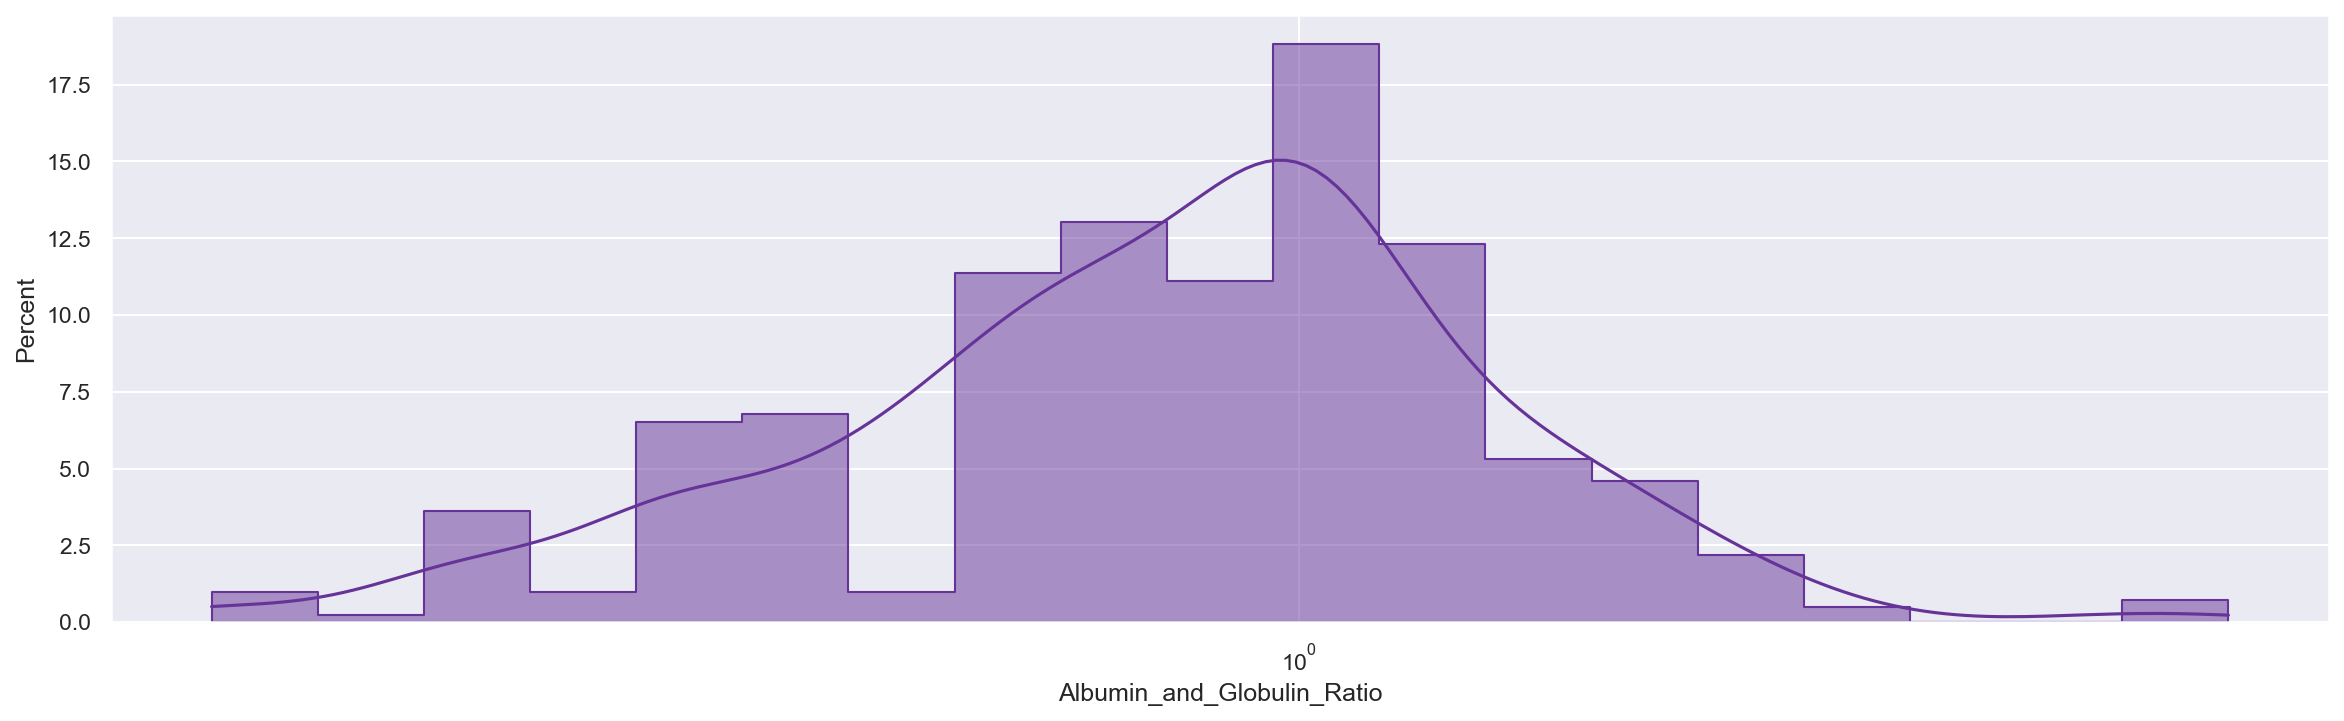

In [20]:
for i in range(2, 10):
    sns.set(rc = {'figure.figsize': (17, 5)})
    sns.histplot(data = df[(df['is_patient'] == 1)], x = df.columns[i], stat = 'percent', element = 'step', kde = True, log_scale = True, color = 'rebeccapurple')
    plt.show()

Since the above plots show the data corresponding to diseased patients without a reference range, it is not possible to draw straightforward conclusions about the values of the biomarkers and likelihood of having liver disease. It may so happen that the largest fraction of diseased people have bilirubin in the range (5, 7) but it may also be that this is the case for all humans in general. Therefore, it is important to see the values of the biomarkers of diseased people and non-diseased people in the same plot to make comparisons.

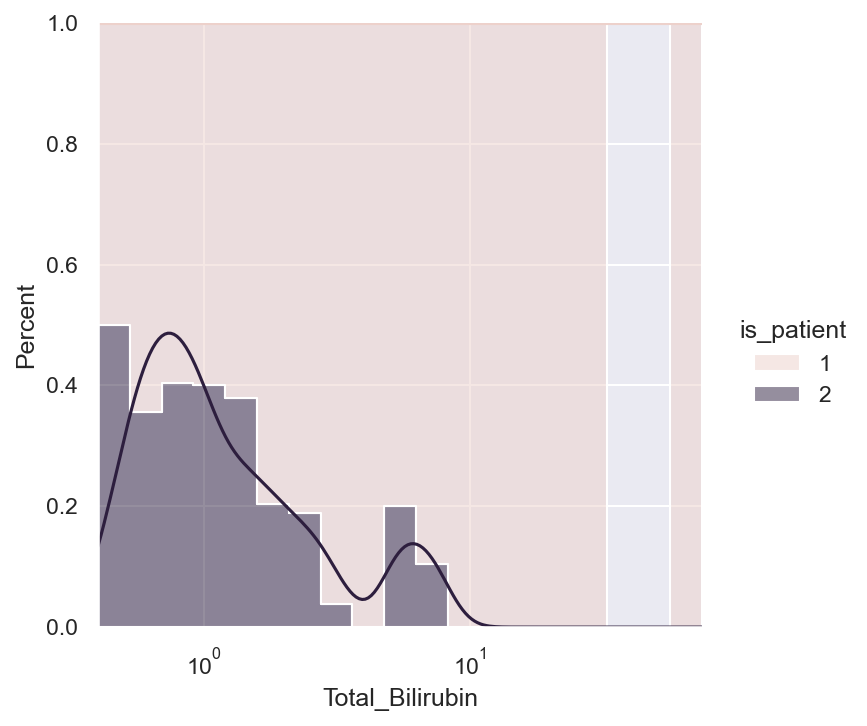

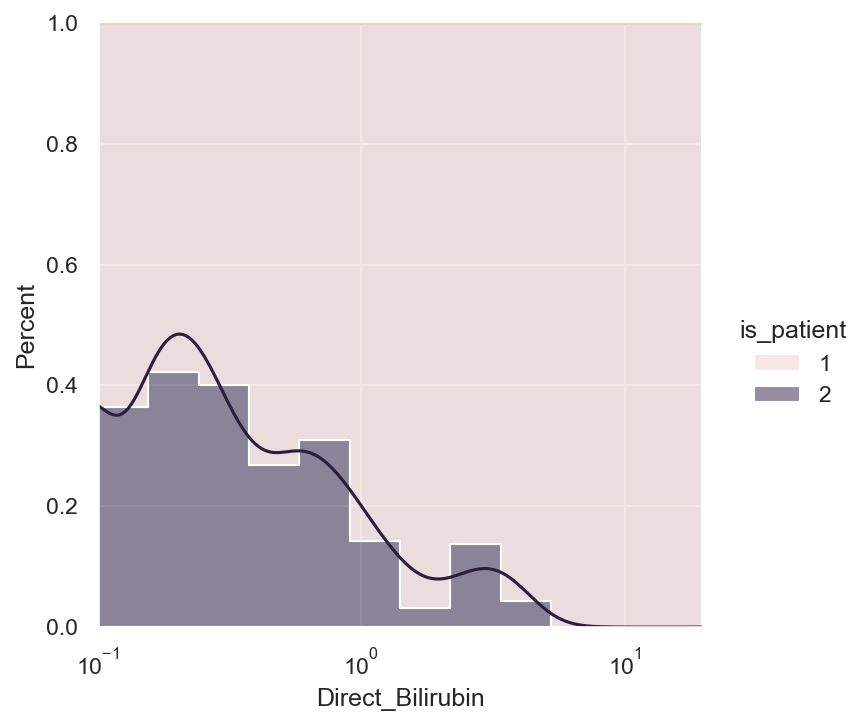

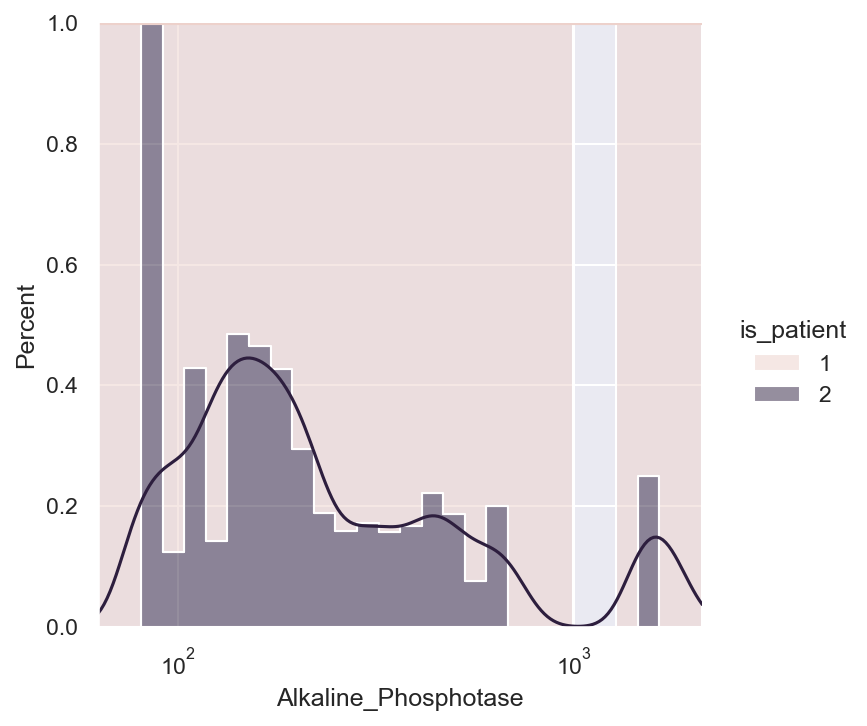

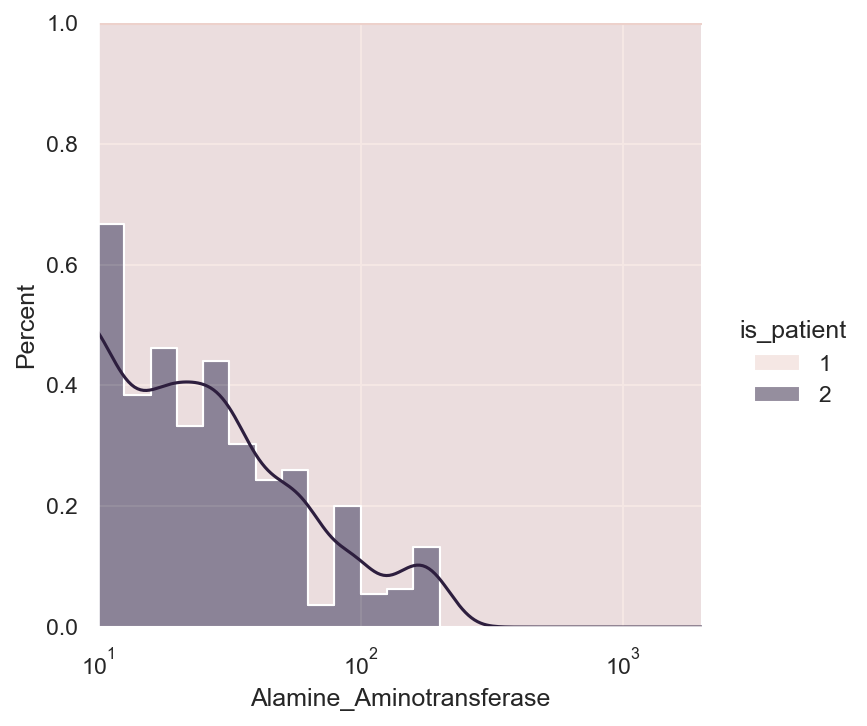

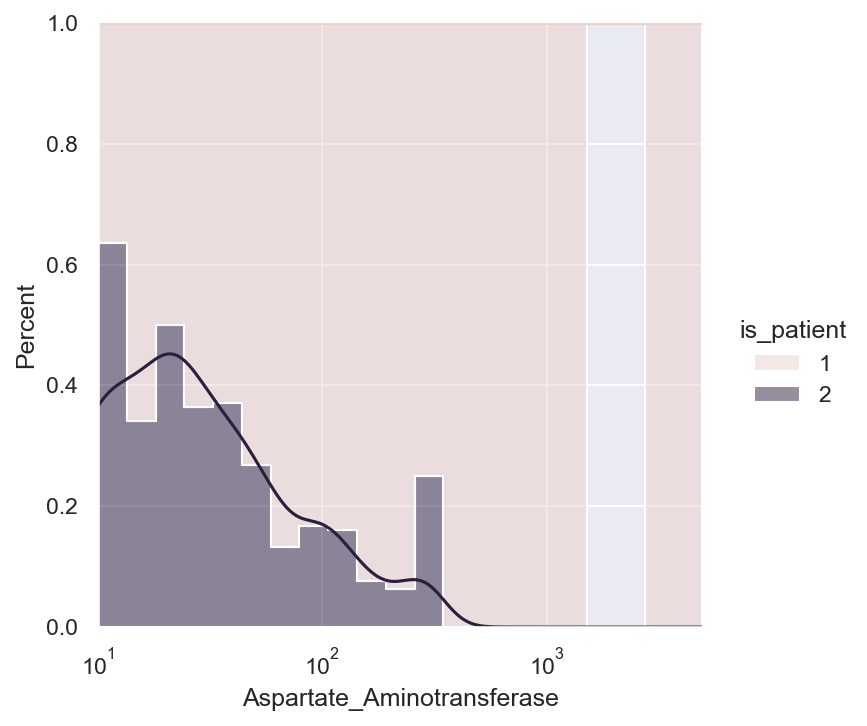

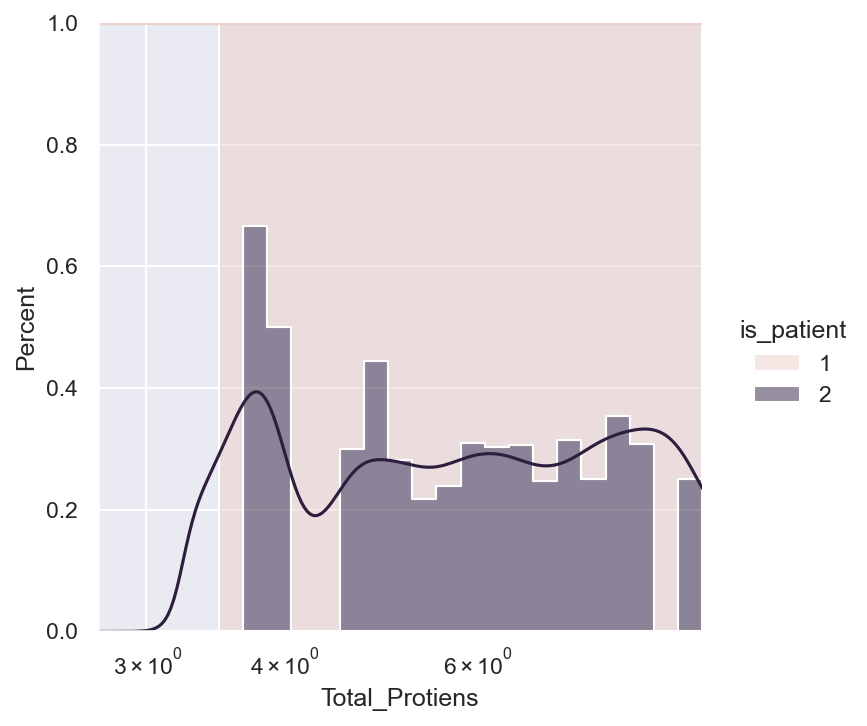

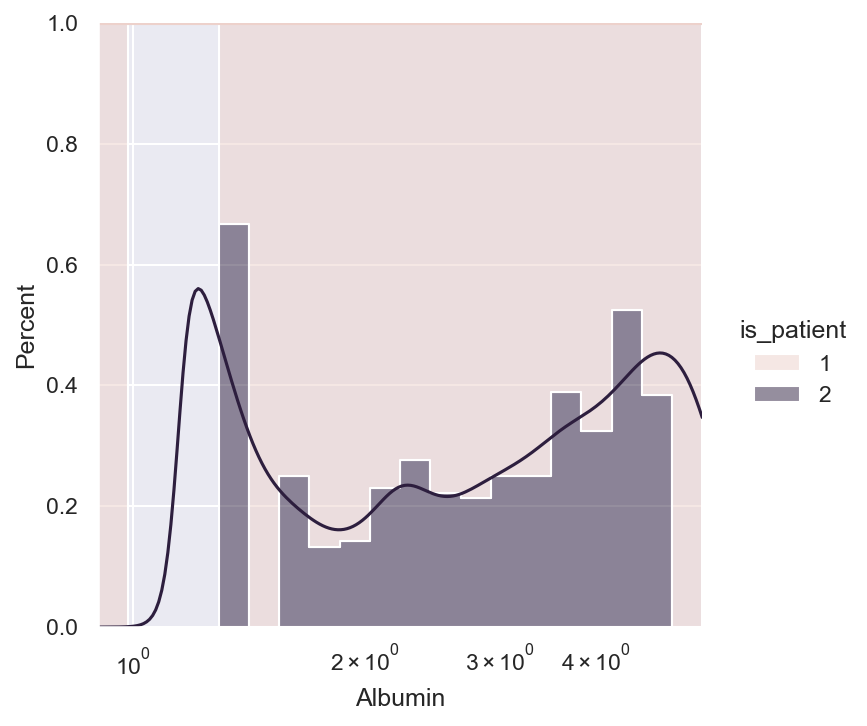

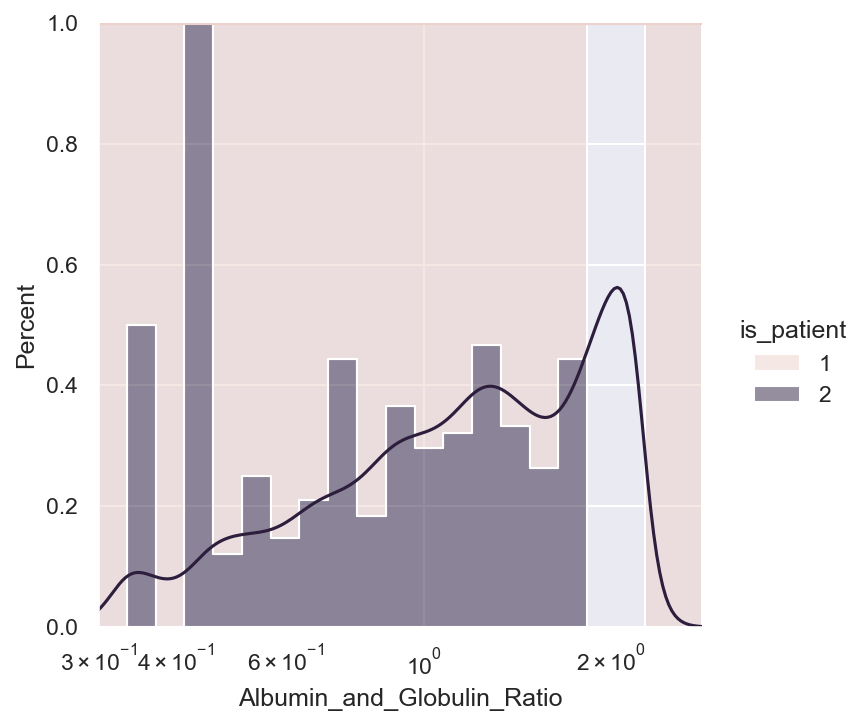

In [21]:
for i in range(2, 10):
    sns.set(rc = {'figure.figsize': (17, 5)})
    sns.displot(data = df, x = df.columns[i], stat = 'percent', hue = 'is_patient', multiple = 'fill', element = 'step', kde = True, log_scale = True)
    plt.show()

These plots demonstrate the 'normal' values of the biomarkers against abnormal values.

Except for protein-related markers, generally speaking, the higher the biomarker value, the greater is the likelihood of liver disease.

For each biomarker, we may identify the approximate value beyond which the percentage of diseased people is higher than that of non-diseased people for a given value of the biomarker. This value could be defined as an empirical threshold beyond which the likelihood of liver disease begins increasing significantly.

Empirical thresholds:

1. Total bilirubin: 0.5

2. Direct bilirubin: No such threshold may be ascertained since the percentage of diseased patients is greater than that of non-diseased patients for all values of the biomarker.

3. Alkaline phosphotase: 200

4. Alamine aminotransferase: 20

5. Aspartate aminotransferase: 30

It can be verified from the univariate plots showing the distribution of diseased patients w.r.t the biomarker values that the maximum number of diseased people indeed have biomarkers higher than the empirical thresholds identified above.

<a id='logReg'></a>

## Logistic regression

Encoding categorical variables:

In [22]:
pd.get_dummies(df['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


Since only one column is enough, the other one is dropped.

In [23]:
df = pd.get_dummies(df, drop_first = True)

In [24]:
X = df.drop(['is_patient'], axis = 1)

Re-encoding the is_patient column to get binary values:

In [25]:
df['is_patient'] = np.where(df['is_patient'] == 2, 0, 1)

y = df['is_patient'] # 1 for liver disease; 2 for no liver disease

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Total_Bilirubin             579 non-null    float64
 2   Direct_Bilirubin            579 non-null    float64
 3   Alkaline_Phosphotase        579 non-null    int64  
 4   Alamine_Aminotransferase    579 non-null    int64  
 5   Aspartate_Aminotransferase  579 non-null    int64  
 6   Total_Protiens              579 non-null    float64
 7   Albumin                     579 non-null    float64
 8   Albumin_and_Globulin_Ratio  579 non-null    float64
 9   is_patient                  579 non-null    int64  
 10  Gender_Male                 579 non-null    uint8  
dtypes: float64(5), int64(5), uint8(1)
memory usage: 66.5 KB


Feature selection (taking only one feature from each pair of correlated features):

In [27]:
X = X[['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Aspartate_Aminotransferase','Total_Protiens', 'Albumin_and_Globulin_Ratio',
       'Gender_Male']]

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

Splitting the dataset for train and test:

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 89)

Creating a logistic regression model and getting predictions:

In [30]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)
log_predicted = logreg.predict(X_test)

print("IDVs:\n", X_train.columns)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)

IDVs:
 Index(['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Aspartate_Aminotransferase', 'Total_Protiens',
       'Albumin_and_Globulin_Ratio', 'Gender_Male'],
      dtype='object')
Coefficient: 
 [[ 0.02057478  0.21411641  0.00070293  0.0106153   0.03806489 -0.32002519
   0.11319223]]
Intercept: 
 [-1.04747392]


Viewing the coefficients:

In [31]:
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Variable']
coeff_df['Coefficient'] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])

coeff_df.sort_values(by = 'Coefficient', ascending = False)

,Variable,Coefficient
1,Total_Bilirubin,0.214116
6,Gender_Male,0.113192
4,Total_Protiens,0.038065
0,Age,0.020575
3,Aspartate_Aminotransferase,0.010615
2,Alkaline_Phosphotase,0.000703
5,Albumin_and_Globulin_Ratio,-0.320025


Checking the performance metrics:

Accuracy: 
 0.745679012345679
Confusion Matrix: 
 [[ 14  92]
 [ 11 288]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.13      0.21       106
           1       0.76      0.96      0.85       299

    accuracy                           0.75       405
   macro avg       0.66      0.55      0.53       405
weighted avg       0.71      0.75      0.68       405



<AxesSubplot:>

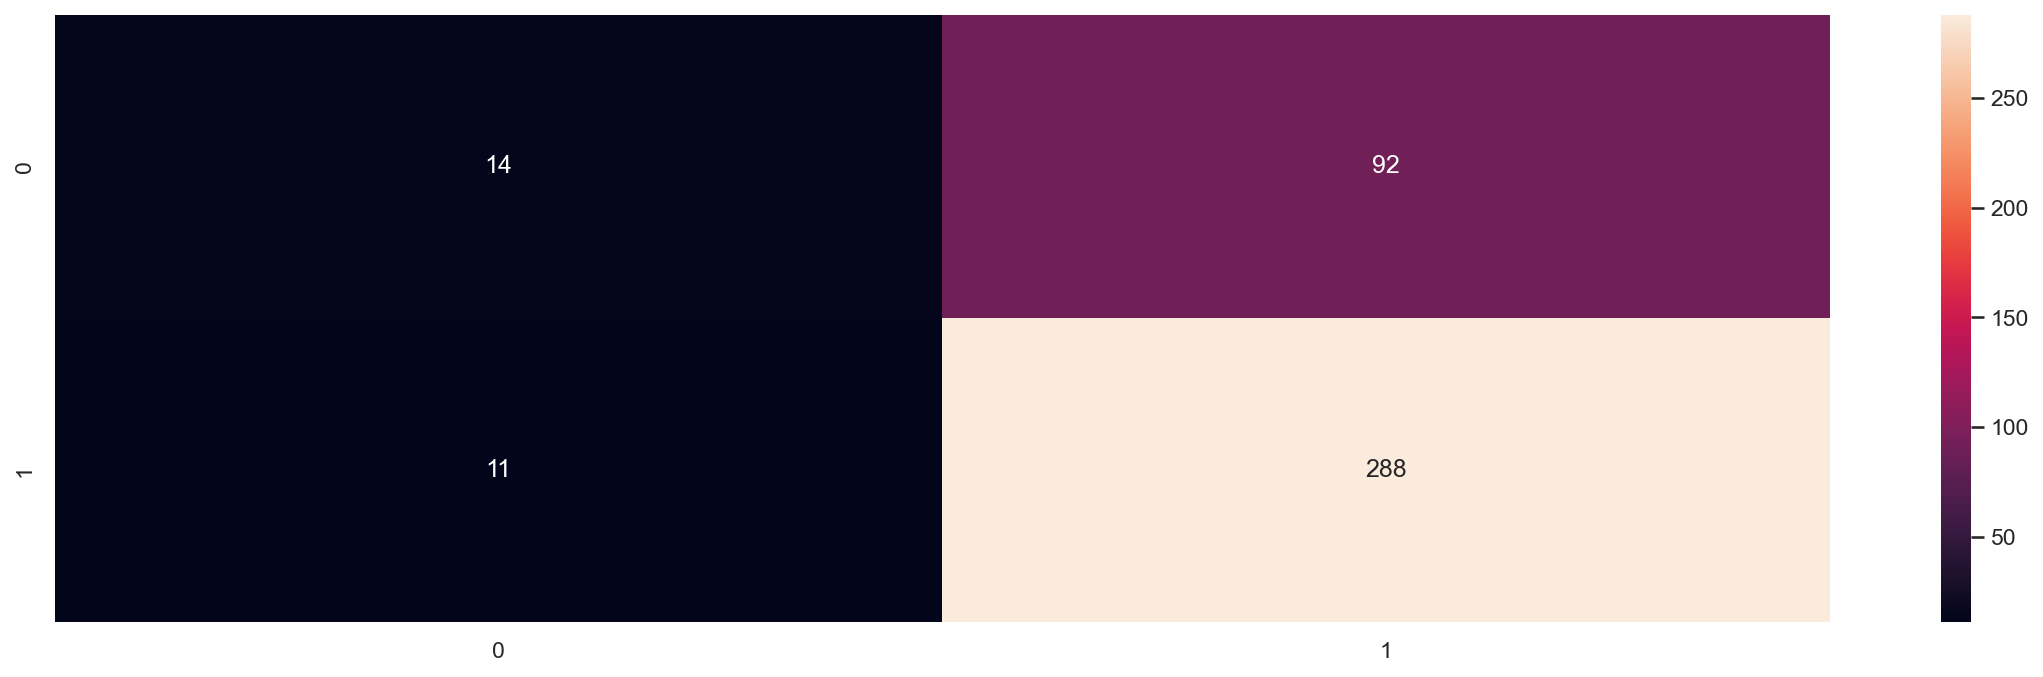

In [32]:
log_predicted_train = logreg.predict(X_train)

print('Accuracy: \n', accuracy_score(y_train, log_predicted_train))
print('Confusion Matrix: \n', confusion_matrix(y_train, log_predicted_train))
print('Classification Report: \n', classification_report(y_train, log_predicted_train))

sns.heatmap(confusion_matrix(y_train, log_predicted_train), annot = True, fmt = 'd')

The precision for those with liver disease is better than that for those who don't have the disease. The recall for liver disease patients is high, indicating a good identification of true positive cases. The recall value is quite low for non-diseased people, indicating that the model is not great at identifying negative cases. The f-score is also significantly high for diseased people. Since the dataset is imbalanced (the support column shows this), f-score is of significance since it takes into account both the recall and precision.

#### AUC-ROC curves for the train and test data sets

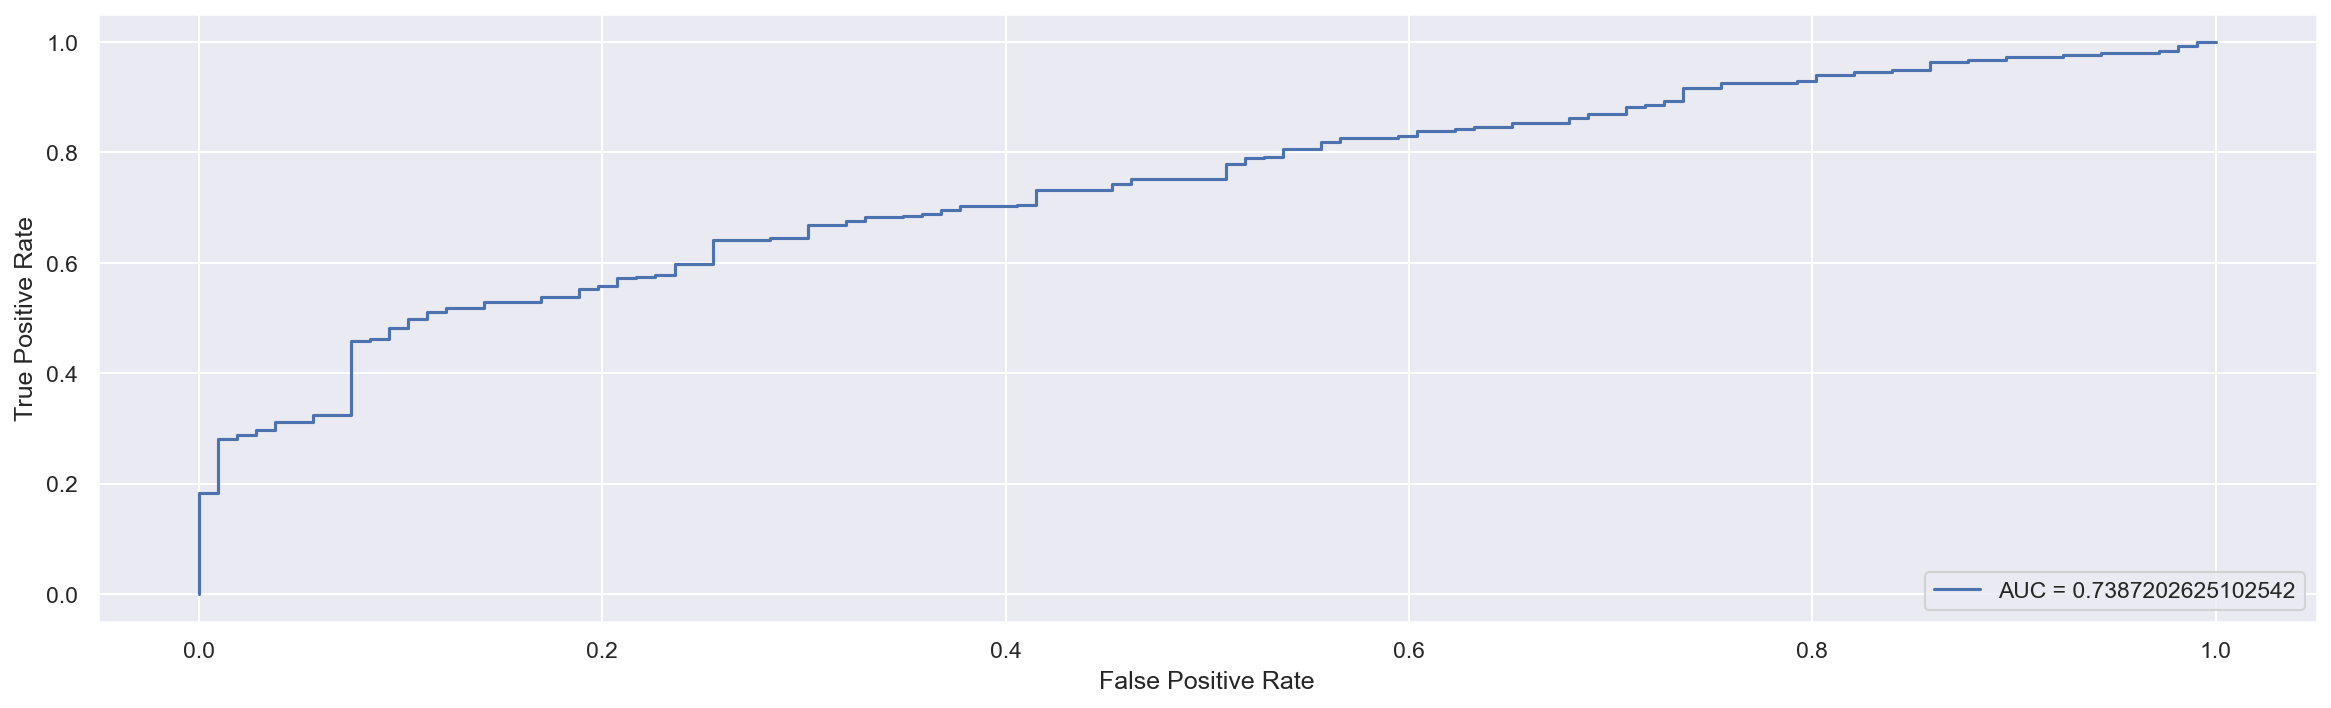

In [33]:
y_pred_proba = logreg.predict_proba(X_train)[::,1]
fpr, tpr, _ = roc_curve(y_train,  y_pred_proba)
auc = roc_auc_score(y_train, y_pred_proba)

plt.plot(fpr, tpr, label = 'AUC = ' + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()

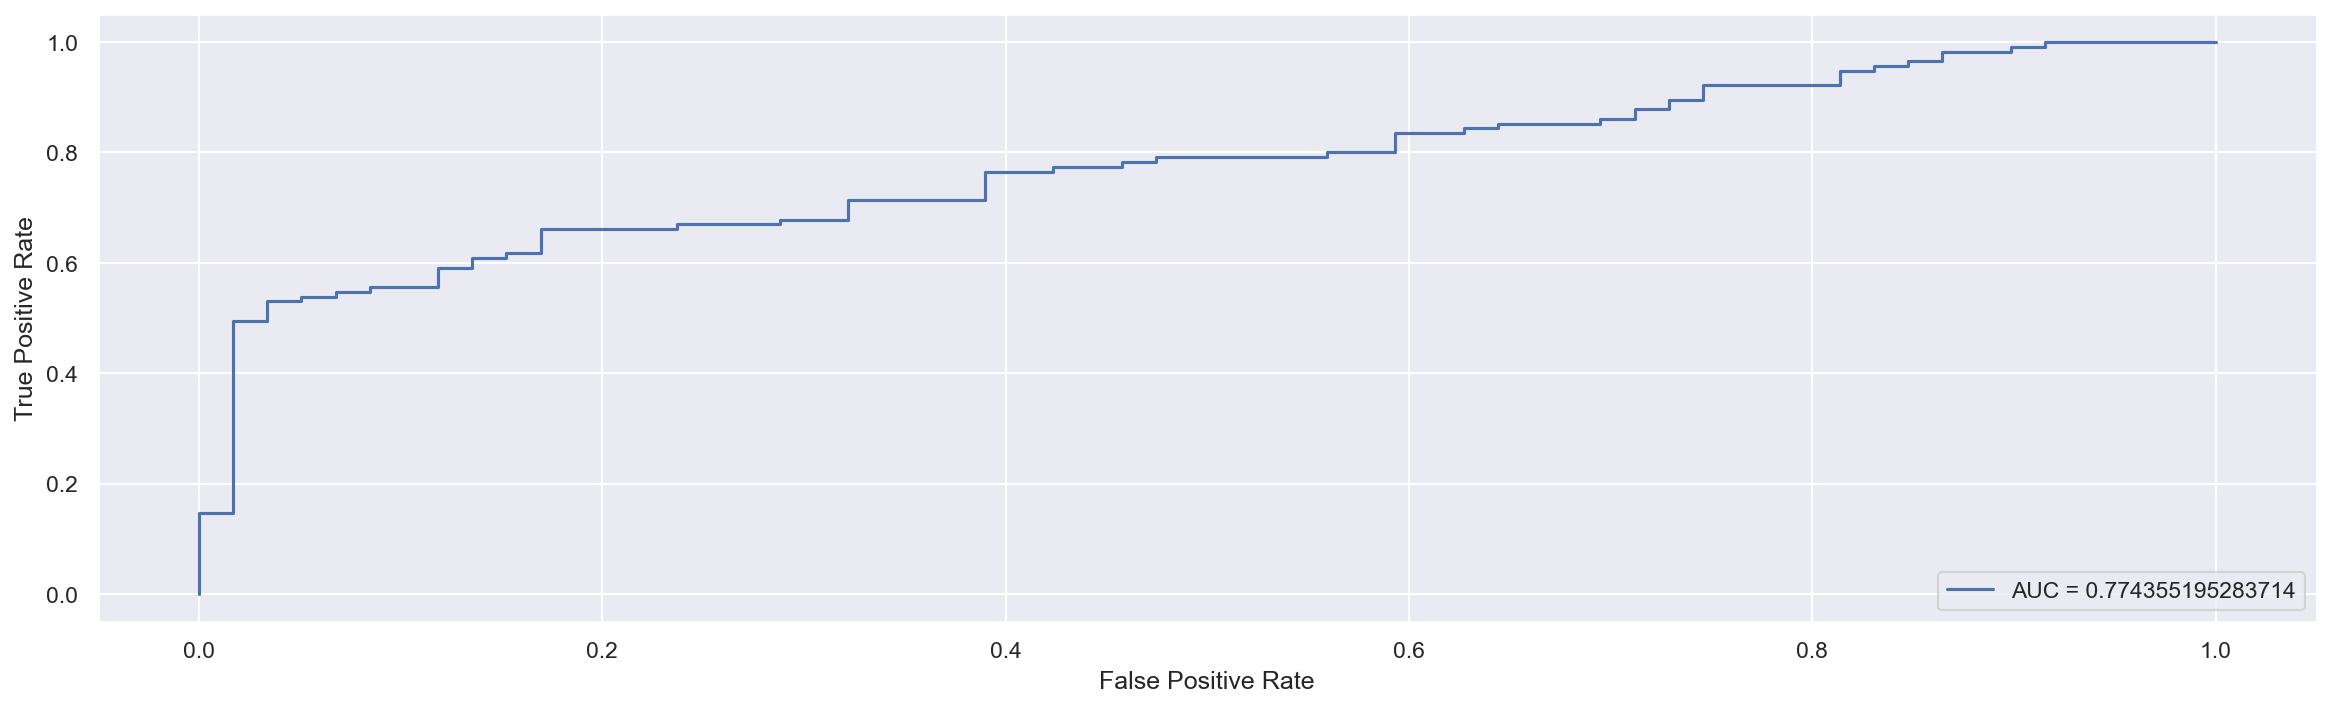

In [34]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr, tpr, label= 'AUC = ' + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()

Accuracy: 
 0.6896551724137931
Confusion Matrix: 
 [[  7  52]
 [  2 113]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.12      0.21        59
           1       0.68      0.98      0.81       115

    accuracy                           0.69       174
   macro avg       0.73      0.55      0.51       174
weighted avg       0.72      0.69      0.60       174



<AxesSubplot:>

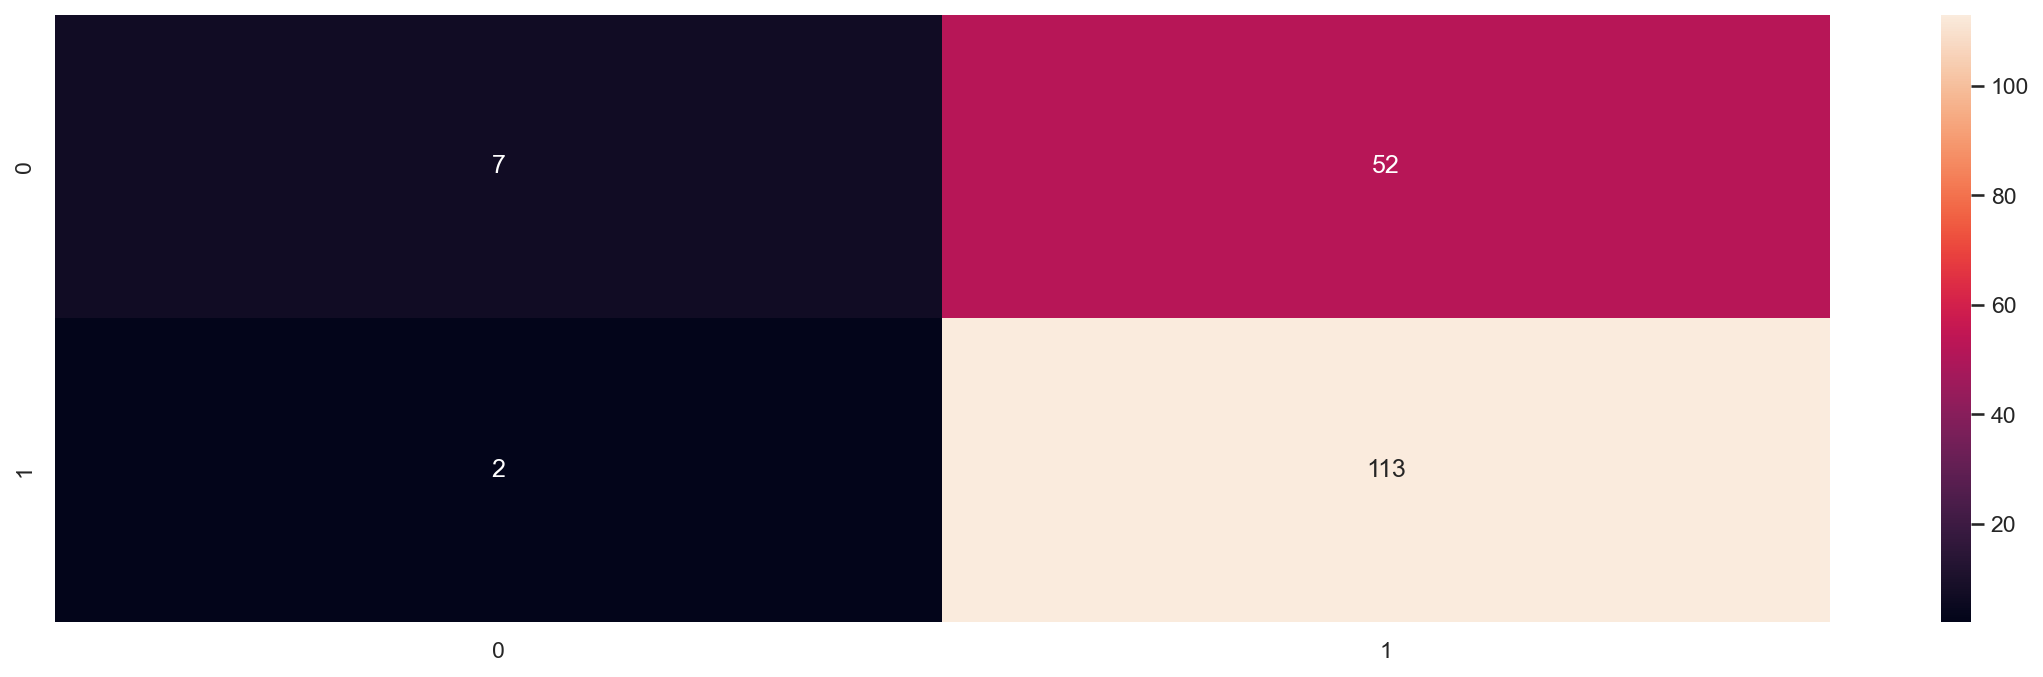

In [35]:
print('Accuracy: \n', accuracy_score(y_test, log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test, log_predicted))
print('Classification Report: \n', classification_report(y_test, log_predicted))

sns.heatmap(confusion_matrix(y_test, log_predicted), annot = True, fmt = 'd')

The precision for those with liver disease is worse than that for those who don't have the disease. The recall for liver disease patients is high, indicating a good identification of true positive cases. The recall value is quite low for non-diseased people, indicating that the model is not great at identifying negative cases. The f-score is also significantly high for diseased people. Since the dataset is imbalanced (the support column shows this), f-score is of significance since it takes into account both the recall and precision.

### Logistic Regression with regularization

In [36]:
logreg = LogisticRegression(penalty = 'l1', C = 10, solver = 'liblinear', max_iter = 1000)
logreg.fit(X_train, y_train)
log_predicted = logreg.predict(X_test)

print("IDVs:\n", X_train.columns)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)

IDVs:
 Index(['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Aspartate_Aminotransferase', 'Total_Protiens',
       'Albumin_and_Globulin_Ratio', 'Gender_Male'],
      dtype='object')
Coefficient: 
 [[ 0.02006395  0.21180959  0.00066058  0.01056149  0.03113808 -0.38846287
   0.10684223]]
Intercept: 
 [-0.89147785]


Accuracy: 
 0.7382716049382716
Confusion Matrix: 
 [[ 12  94]
 [ 12 287]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.11      0.18       106
           1       0.75      0.96      0.84       299

    accuracy                           0.74       405
   macro avg       0.63      0.54      0.51       405
weighted avg       0.69      0.74      0.67       405



<AxesSubplot:>

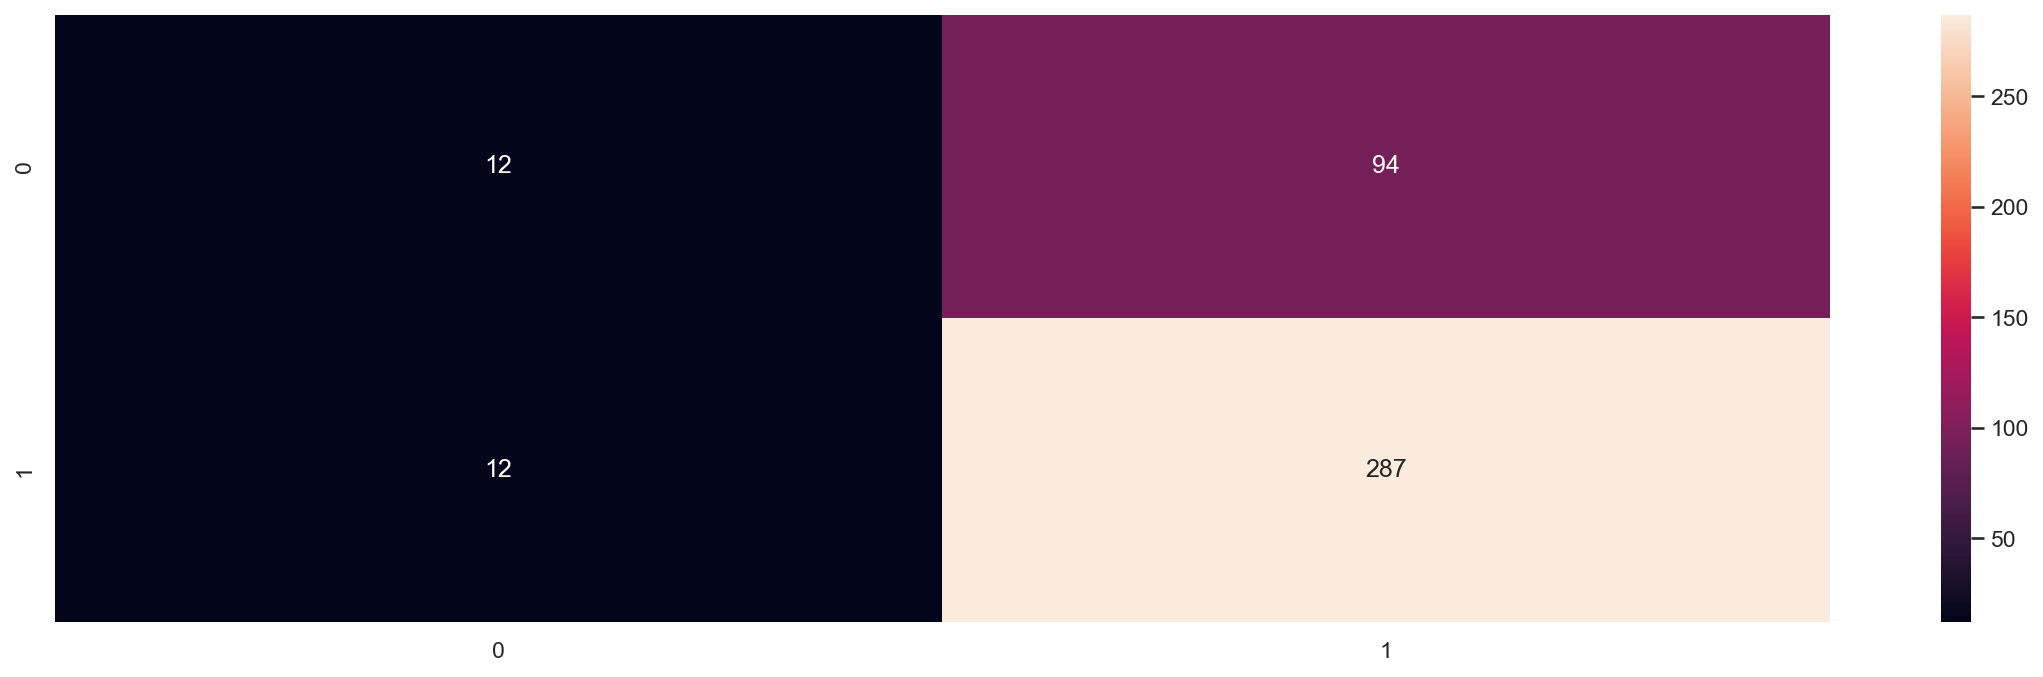

In [37]:
log_predicted_train = logreg.predict(X_train)

print('Accuracy: \n', accuracy_score(y_train, log_predicted_train))
print('Confusion Matrix: \n', confusion_matrix(y_train, log_predicted_train))
print('Classification Report: \n', classification_report(y_train, log_predicted_train))

sns.heatmap(confusion_matrix(y_train, log_predicted_train), annot = True, fmt = 'd')

Accuracy: 
 0.6954022988505747
Confusion Matrix: 
 [[  8  51]
 [  2 113]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.14      0.23        59
           1       0.69      0.98      0.81       115

    accuracy                           0.70       174
   macro avg       0.74      0.56      0.52       174
weighted avg       0.73      0.70      0.61       174



<AxesSubplot:>

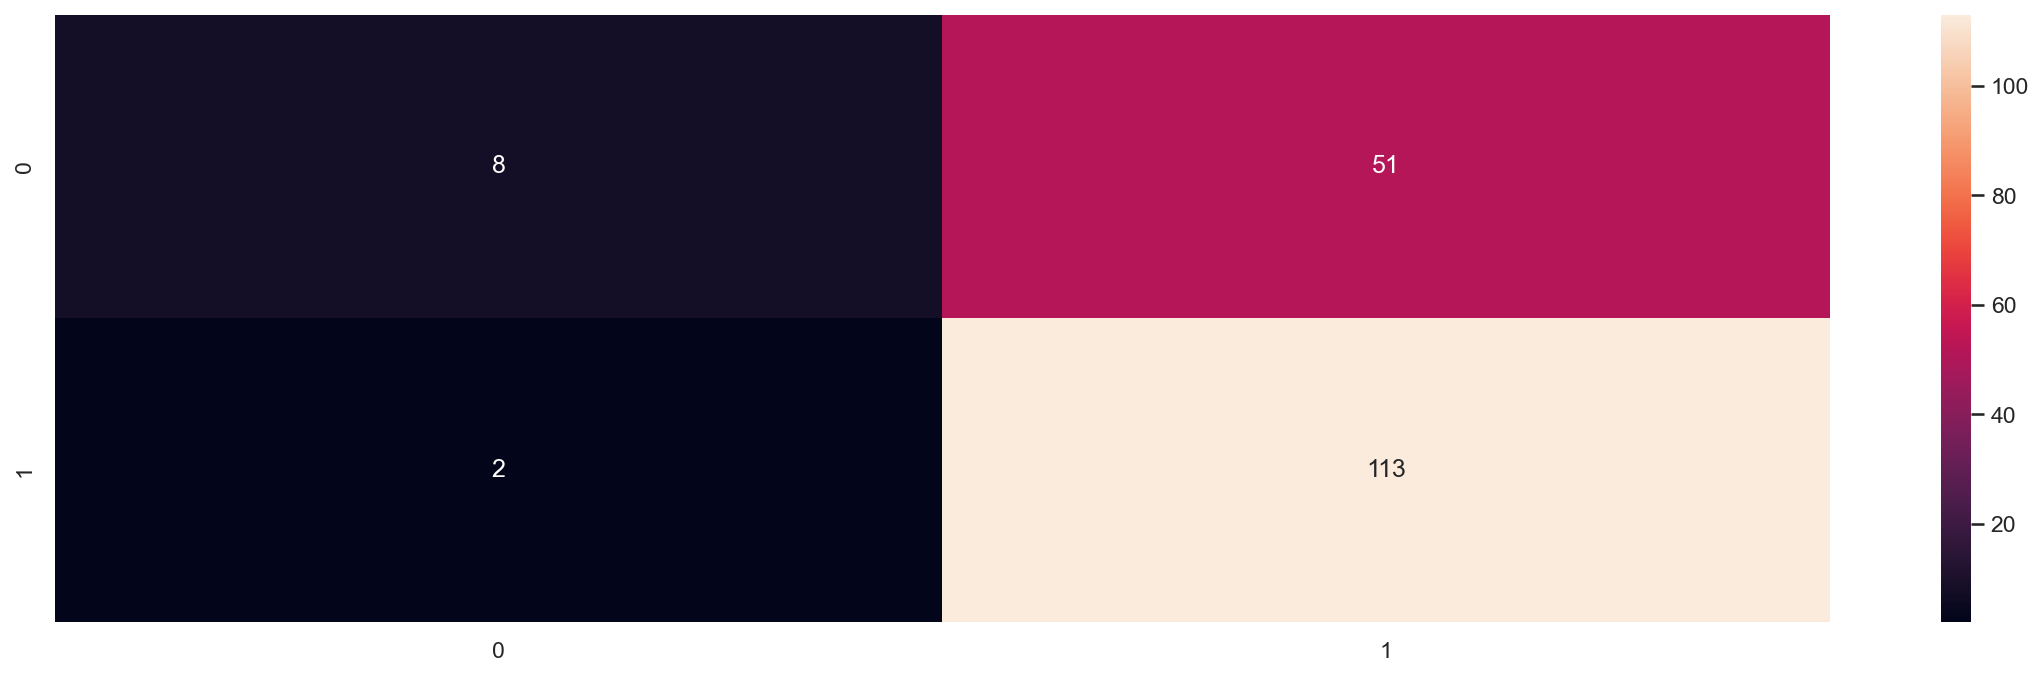

In [38]:
print('Accuracy: \n', accuracy_score(y_test, log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test, log_predicted))
print('Classification Report: \n', classification_report(y_test, log_predicted))

sns.heatmap(confusion_matrix(y_test, log_predicted), annot = True, fmt = 'd')

There is no significant improvement in the results with regularization.

<a id='linReg'></a>

## Linear Regression

#### Linear regression with is_patient also as an input variable to predict alamine aminotransferase values

Encoding the is_patient column as a categorical variable and using it as an independent variable:

In [39]:
label_patient = LabelEncoder()

df['is_patient'] = label_patient.fit_transform(df['is_patient'])

Defining the dependent variable and removing it from the dataset for test:

In [40]:
X = df.drop(['Alamine_Aminotransferase'], axis = 1)
y = df['Alamine_Aminotransferase']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

In [41]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
R2_Scores = []
models = ['Linear Regression' , 'Lasso Regression']

In [43]:
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5, verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

print("Linear Regression Coefficients: \n")
print(clf_lr.coef_)

R2_Scores.append(r2)

import statsmodels.api as sm

x_train = X_train
y_train_2 = y_train
x_train_1 = sm.add_constant(x_train)
model = sm.OLS(y_train_2, x_train_1)
results = model.fit()
print(results.summary())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished



####### Linear Regression #######
Score : 0.5757
[ 0.22449928  0.58674226  0.83061417  0.52925217 -0.51336291]

MSE    : 4377.99 
MAE    : 39.58 
RMSE   : 66.17 
R2     : 0.58 
Linear Regression Coefficients: 

[-14.89185493   2.3448254   13.04508996  -2.46204913 153.09035186
 -44.06740463  53.58611854 -14.41650789  12.92176469   2.20394935]
                               OLS Regression Results                               
Dep. Variable:     Alamine_Aminotransferase   R-squared:                       0.652
Model:                                  OLS   Adj. R-squared:                  0.645
Method:                       Least Squares   F-statistic:                     84.87
Date:                      Fri, 18 Nov 2022   Prob (F-statistic):           3.75e-97
Time:                              15:36:55   Log-Likelihood:                -2861.0
No. Observations:                       463   AIC:                             5744.
Df Residuals:                           452   BIC:          

In [44]:
clf_la = Lasso(normalize = True)
clf_la.fit(X_train, y_train)
accuracies = cross_val_score(estimator = clf_la, X = X_train, y = y_train, cv = 5, verbose = 1)
y_pred = clf_la.predict(X_test)
print('')
print('###### Lasso Regression ######')
print('Score : %.4f' % clf_la.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print("Lasso Regression Coefficients: \n")
print(clf_la.coef_)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


###### Lasso Regression ######
Score : 0.5387
[ 0.64623726  0.5111944   0.75057201  0.61346061 -0.18682337]
Lasso Regression Coefficients: 

[ -0.           0.           0.           0.         135.70197711
  -0.           0.           0.           0.           0.        ]

MSE    : 4760.77 
MAE    : 34.49 
RMSE   : 69.00 
R2     : 0.54 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [45]:
clf_rr = Ridge(normalize = True)
clf_rr.fit(X_train, y_train)
accuracies = cross_val_score(estimator = clf_rr, X = X_train, y = y_train, cv = 5, verbose = 1)
y_pred = clf_rr.predict(X_test)
print('')
print('###### Ridge Regression ######')
print('Score : %.4f' % clf_rr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print("Ridge Regression Coefficients: \n")
print(clf_rr.coef_)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


###### Ridge Regression ######
Score : 0.3826
[0.42332736 0.34627677 0.52575434 0.41643269 0.51194714]
Ridge Regression Coefficients: 

[-9.05666795  7.86554101 10.52664665  3.84124947 75.19648485 -5.07702252
  3.39791545  4.02436201  9.17949399  3.70556999]

MSE    : 6371.66 
MAE    : 44.69 
RMSE   : 79.82 
R2     : 0.38 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


The results are not satisfactory and hence, this approach is not recommended.